In [4]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

In [9]:
df=pd.read_csv(r"C:\Users\91703\Downloads\Bengaluru_House_Data.csv")
df

area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.0      1.0   39.07  
1      4 Bedroom  Theanmp       2600   5.0      3.0  120.00  
2          3 BHK      NaN       1440   2.0      3.0   62.00  
3          3 BHK  Soiewre       1521   3.0      1.0   95.00  
4          2 BHK      NaN       1200   2.0      1.0   51.00  
...          ...      ...        ...   ...      ...     ...  
13315  5 Bedroom  ArsiaEx       3453   4.0      0.0  231.00  
13316      4 BHK      NaN       3600   5.0      NaN  400.00  
13317      2 BHK  Mahla T       1141   2.0      1.0   60.00  
13318      4 BHK  SollyCl       4689   4.0      1.0  488.00  
13319      1 BHK      NaN        550   1.0      1.0   17.00  

[13320 rows x 9 columns]

In [10]:
# clean the feature of "total_sqft" lot of scale varient and unclean data in this feature

In [14]:
df['bath']=df['bath'].astype('int')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

16


(array([  579,  1775,  2264,  2809,  2862,  5333,  6423,  6636,  6719,
         7680,  8306,  8565,  8703, 10634, 11019, 11569], dtype=int64),)

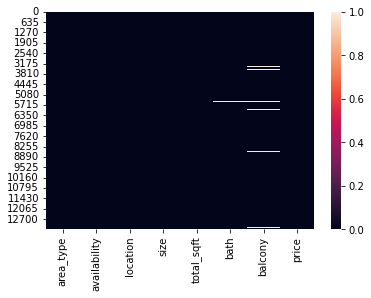

In [171]:
# df.drop('society',axis=1,inplace=True)
sns.heatmap(df.isnull())
print(df['size'].isnull().sum())
# df['size'].fillna(df['size'].mode()[0],inplace=True)
np.where(df['size'].isnull())

In [4]:
def total_sqft(str1):
    if re.findall('[\d]+[\s]*[-]{1}[\s]*[\d]',str1):
            a=re.findall('[\d]+[\s]*[-]{1}[\s]*[\d]+',str1)
#             print(a[0])
            z=re.split('-',a[0])
#             print(z[0],z[1])
            a1=int(z[0])
            a2=int(z[1])
            mean=(a1+a2)/2
#             print(mean)
#             list1.append(mean)
            return str(mean)
#     list1=[]
#     elif 'Sq. Meter' in str1:
#         for i in str1:
#             if i.isdecimal()
#                 list1.append(i)
    
    else:
        
        if 'Acres' in str1:
            list1=[]
            for i in str1:
                if i.isdecimal() or i=='.':
                    list1.append(i) 
            h=''.join(list1)
            Sqaure_foot=float(h)*43560
            return str(round(Sqaure_foot,2))    
                    
            
        elif 'Sq. Meter' in str1:
            list1=[]
            for i in str1:
                if i.isdecimal() or i=='.':
                    list1.append(i)
            if list1.count('.')==2:
                list1.pop(-1)
                h=''.join(list1)
                Sqaure_foot=float(h)*10.764
                return str(round(Sqaure_foot,2))
            else:
                h=''.join(list1)
                Sqaure_foot=float(h)*10.764
                return str(round(Sqaure_foot,2))
        elif 'Sq. Yards' in str1:
            list1=[]
            for i in str1:
                if i.isdecimal() or i=='.':
                    list1.append(i)
            if list1.count('.')==2:
                list1.pop(-1)
                h=''.join(list1)
                Sqaure_foot=float(h)*9
                return str(round(Sqaure_foot,2))
            else:
                h=''.join(list1)
                Sqaure_foot=float(h)*9
                return str(round(Sqaure_foot,2))
        else:
            list1=[]
            for i in str1:
                if i.isdecimal() or i=='.':
                    list1.append(i)
            
            return ''.join(list1)
                    

df['total_sqft_clean1']=df['total_sqft'].apply(total_sqft).astype('float')

In [5]:
# compare unclean and clean feature (all unit converted into "sqaure feet")

In [6]:
print(df[['total_sqft_clean1','total_sqft']].to_string())

       total_sqft_clean1         total_sqft
0                1056.00               1056
1                2600.00               2600
2                1440.00               1440
3                1521.00               1521
4                1200.00               1200
5                1170.00               1170
6                2732.00               2732
7                3300.00               3300
8                1310.00               1310
9                1020.00               1020
10               1800.00               1800
11               2785.00               2785
12               1000.00               1000
13               1100.00               1100
14               2250.00               2250
15               1175.00               1175
16               1180.00               1180
17               1540.00               1540
18               2770.00               2770
19               1100.00               1100
20                600.00                600
21               1755.00        

In [7]:
print(df[['total_sqft_clean1','total_sqft']].to_string())

       total_sqft_clean1         total_sqft
0                1056.00               1056
1                2600.00               2600
2                1440.00               1440
3                1521.00               1521
4                1200.00               1200
5                1170.00               1170
6                2732.00               2732
7                3300.00               3300
8                1310.00               1310
9                1020.00               1020
10               1800.00               1800
11               2785.00               2785
12               1000.00               1000
13               1100.00               1100
14               2250.00               2250
15               1175.00               1175
16               1180.00               1180
17               1540.00               1540
18               2770.00               2770
19               1100.00               1100
20                600.00                600
21               1755.00        

In [8]:
df

area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  total_sqft_clean1  
0          2 BHK  Coomee        1056   2.0      1.0   39.07             1056.0  
1      4 Bedroom  Theanmp       2600   5.0      3.0  120.00             2600.0  
2          3 BHK      NaN       1440   2.0      3.0   62.00             1440.0  
3          3 BHK  Soiewre       1521   3.0      1.0   95.00             1521.0  
4          2 BHK      NaN       1200   2.0      1.0   51.00             1200.0  
...          ...      ...        ...   ...      ...     ...                ...  
13315  5 Bedroom  ArsiaEx       3453   4.0      0.0  231.00             3453.0  
13316      4 BHK      NaN       3600   5.0      NaN  400.00             3600.0  
13317      2 BHK  Mahla T       1141   2.0      1.0   60.00             1141.0  
13318      4 BHK  SollyCl       4689   4.0      1.0  488.00             4689.0  
13319      1 BHK      NaN        550   1.0      1.0   17.00              550.0  

[13320 rows x 10 columns]

In [9]:
df['size'].unique()  #one hot encoding

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df['location'].nunique()

1305

In [15]:
df1=pd.get_dummies(df['location'])

In [16]:
df1

Anekal   Banaswadi   Basavangudi   Bhoganhalli   Devarabeesana Halli  \
0            0           0             0             0                     0   
1            0           0             0             0                     0   
2            0           0             0             0                     0   
3            0           0             0             0                     0   
4            0           0             0             0                     0   
...        ...         ...           ...           ...                   ...   
13315        0           0             0             0                     0   
13316        0           0             0             0                     0   
13317        0           0             0             0                     0   
13318        0           0             0             0                     0   
13319        0           0             0             0                     0   

        Devarachikkanahalli   Electronic City   Mysore Highway   Rachenahalli  \
0                         0                 0                0              0   
1                         0                 0                0              0   
2                         0                 0                0              0   
3                         0                 0                0              0   
4                         0                 0                0              0   
...                     ...               ...              ...            ...   
13315                     0                 0                0              0   
13316                     0                 0                0              0   
13317                     0                 0                0              0   
13318                     0                 0                0              0   
13319                     0                 0                0              0   

        Sector 1 HSR Layout  ...  rr nagar  sankeswari  sapthagiri Layout  \
0                         0  ...         0           0                  0   
1                         0  ...         0           0                  0   
2                         0  ...         0           0                  0   
3                         0  ...         0           0                  0   
4                         0  ...         0           0                  0   
...                     ...  ...       ...         ...                ...   
13315                     0  ...         0           0                  0   
13316                     0  ...         0           0                  0   
13317                     0  ...         0           0                  0   
13318                     0  ...         0           0                  0   
13319                     0  ...         0           0                  0   

       sarjapura main road  singapura paradise  t.c palya  tc.palya  \
0                        0                   0          0         0   
1                        0                   0          0         0   
2                        0                   0          0         0   
3                        0                   0          0         0   
4                        0                   0          0         0   
...                    ...                 ...        ...       ...   
13315                    0                   0          0         0   
13316                    0                   0          0         0   
13317                    0                   0          0         0   
13318                    0                   0          0         0   
13319                    0                   0          0         0   

       vinayakanagar  white field,kadugodi  whitefiled  
0                  0                     0           0  
1                  0                     0           0  
2                  0                     0           0  
3                  0                     0           0  
4          

In [12]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [22]:
print(df['location'].isnull().sum())

1


In [18]:
print(df['location'].value_counts().to_string())

Whitefield                                            540
Sarjapur  Road                                        399
Electronic City                                       302
Kanakpura Road                                        273
Thanisandra                                           234
Yelahanka                                             213
Uttarahalli                                           186
Hebbal                                                177
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Bannerghatta Road                                     152
Hennur Road                                           152
7th Phase JP Nagar                                    149
Haralur Road                                          142
Electronic City Phase II                              132
Rajaji Nagar                                          107
Chandapura                                            100
Bellandur     

In [24]:
df['area_type'].isnull().sum()

0

In [25]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [27]:
df['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [ ]:
bdf['price_per_sqft'] = (bdf['price'] * 100000)/bdf['total_sqft']

In [30]:
df['size']=df['size'].apply(lambda x:x.split( )[0] if type(x)==str else x)

In [ ]:
# for i,j in df.groupby('size'):
#     for k,l in df.groupby('location'):
# #         if j.size

In [48]:
for k,l in df.groupby(['location','size']):
        if l.size

           area_type   availability location size society total_sqft  bath  \
2557  Built-up  Area  Ready To Move   Anekal    1     NaN        351   1.0   

      balcony  price  total_sqft_clean1  
2557      1.0   16.0              351.0  
                 area_type   availability    location size  society  \
8385  Super built-up  Area  Ready To Move   Banaswadi    1  Krntsee   

     total_sqft  bath  balcony  price  total_sqft_clean1  
8385        527   1.0      0.0   35.0              527.0  
                 area_type   availability      location size society  \
7638  Super built-up  Area  Ready To Move   Basavangudi    1     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
7638        670   1.0      1.0   50.0              670.0  
                 area_type availability      location size  society  \
2486  Super built-up  Area       19-Dec   Bhoganhalli    1  Rosha I   

     total_sqft  bath  balcony  price  total_sqft_clean1  
2486        296   1.0      0.0  2

6427       1800   5.0      1.0  250.0             1800.0  
                 area_type   availability              location size society  \
8470  Super built-up  Area  Ready To Move  1st Block HBR Layout    1     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
8470        600   1.0      0.0   45.0              600.0  
            area_type   availability              location size society  \
12564  Built-up  Area  Ready To Move  1st Block HBR Layout    4     NaN   

      total_sqft  bath  balcony  price  total_sqft_clean1  
12564       3150   4.0      2.0  150.0             3150.0  
       area_type   availability              location size society total_sqft  \
6675  Plot  Area  Ready To Move  1st Block HBR Layout    5     NaN       2500   

      bath  balcony  price  total_sqft_clean1  
6675   6.0      3.0  500.0             2500.0  
       area_type   availability               location size society  \
4691  Plot  Area  Ready To Move  1st Block HRBR Layout   10  

6195      NaN       4273   3.0      NaN  1100.0             4273.0  
        area_type   availability               location size society  \
10799  Plot  Area  Ready To Move  2nd Block Hrbr Layout    4     NaN   
12519  Plot  Area  Ready To Move  2nd Block Hrbr Layout    4     NaN   

      total_sqft  bath  balcony  price  total_sqft_clean1  
10799       1050   6.0      1.0   74.0             1050.0  
12519       1350   4.0      3.0  235.0             1350.0  
       area_type   availability               location size society  \
3915  Plot  Area  Ready To Move  2nd Block Hrbr Layout    5     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
3915       1250   5.0      NaN  300.0             1250.0  
           area_type   availability             location size society  \
5909  Built-up  Area  Ready To Move  2nd Block Jayanagar    2     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
5909       1000   2.0      1.0   97.0             1000.0  
        

           area_type   availability              location size society  \
1871  Built-up  Area  Ready To Move  3rd Block HBR Layout    3     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
1871       2000   3.0      1.0  100.0             2000.0  
                  area_type   availability               location size  \
560    Super built-up  Area  Ready To Move  3rd Block Hrbr Layout    2   
7422             Plot  Area  Ready To Move  3rd Block Hrbr Layout    2   
9359         Built-up  Area  Ready To Move  3rd Block Hrbr Layout    2   
11382        Built-up  Area  Ready To Move  3rd Block Hrbr Layout    2   

       society total_sqft  bath  balcony  price  total_sqft_clean1  
560    Icncy R       1056   2.0      1.0   80.0             1056.0  
7422       NaN       1200   2.0      1.0  200.0             1200.0  
9359   Icncy R       1320   2.0      3.0   90.0             1320.0  
11382  Icncy R       1300   2.0      3.0   95.0             1300.0  
            area_

                  area_type   availability            location size  society  \
367    Super built-up  Area  Ready To Move  5th Phase JP Nagar    2  Mangsr    
493          Built-up  Area  Ready To Move  5th Phase JP Nagar    2  Prenty    
760    Super built-up  Area         18-Aug  5th Phase JP Nagar    2      NaN   
1012         Built-up  Area  Ready To Move  5th Phase JP Nagar    2      NaN   
1493   Super built-up  Area  Ready To Move  5th Phase JP Nagar    2      NaN   
1961   Super built-up  Area  Ready To Move  5th Phase JP Nagar    2      NaN   
2766   Super built-up  Area  Ready To Move  5th Phase JP Nagar    2  Sorta S   
5378   Super built-up  Area  Ready To Move  5th Phase JP Nagar    2      NaN   
6027         Built-up  Area  Ready To Move  5th Phase JP Nagar    2      NaN   
6395   Super built-up  Area  Ready To Move  5th Phase JP Nagar    2      NaN   
6548   Super built-up  Area  Ready To Move  5th Phase JP Nagar    2  Maodser   
7258   Super built-up  Area  Ready To Mo

12730         1046   2.0      1.0  48.000             1046.0  
                  area_type   availability            location size  society  \
849    Super built-up  Area         18-Jun  8th Phase JP Nagar    3      NaN   
2389   Super built-up  Area         18-Jun  8th Phase JP Nagar    3      NaN   
2723   Super built-up  Area         20-Mar  8th Phase JP Nagar    3  Vaarech   
3196   Super built-up  Area  Ready To Move  8th Phase JP Nagar    3      NaN   
4641   Super built-up  Area         18-Jun  8th Phase JP Nagar    3      NaN   
6125             Plot  Area  Ready To Move  8th Phase JP Nagar    3  Hincy V   
6769   Super built-up  Area         19-Mar  8th Phase JP Nagar    3  Vaarech   
6784         Built-up  Area  Ready To Move  8th Phase JP Nagar    3      NaN   
8167   Super built-up  Area  Ready To Move  8th Phase JP Nagar    3  Yaenti    
8524   Super built-up  Area  Ready To Move  8th Phase JP Nagar    3  GRhtsei   
8804   Super built-up  Area  Ready To Move  8th Phase JP 

10221       1500   2.0      0.0   85.0             1500.0  
           area_type   availability        location size society total_sqft  \
4270      Plot  Area  Ready To Move  A Narayanapura    4     NaN       1150   
4706      Plot  Area  Ready To Move  A Narayanapura    4     NaN       1650   
4812  Built-up  Area  Ready To Move  A Narayanapura    4     NaN       1150   

      bath  balcony  price  total_sqft_clean1  
4270   3.0      1.0  110.0             1150.0  
4706   4.0      3.0  320.0             1650.0  
4812   4.0      1.0  110.0             1150.0  
        area_type availability                         location size society  \
10763  Plot  Area       18-Apr  AECS LAYOUT A-BLOCK Singasandra    5     NaN   

      total_sqft  bath  balcony  price  total_sqft_clean1  
10763       1200   5.0      1.0  225.0             1200.0  
                  area_type   availability     location size  society  \
305    Super built-up  Area  Ready To Move  AECS Layout    2  Soran U   
1632

                 area_type   availability            location size  society  \
8687  Super built-up  Area  Ready To Move  Addischetan Layout    3  Malyxer   

     total_sqft  bath  balcony  price  total_sqft_clean1  
8687       1495   3.0      2.0   55.0             1495.0  
       area_type   availability     location size society total_sqft  bath  \
2844  Plot  Area  Ready To Move  Adityanagar    1     NaN       1260   1.0   
3513  Plot  Area  Ready To Move  Adityanagar    1     NaN       1260   1.0   

      balcony  price  total_sqft_clean1  
2844      0.0   41.0             1260.0  
3513      1.0   41.0             1260.0  
       area_type   availability     location size society total_sqft  bath  \
5934  Plot  Area  Ready To Move  Adityanagar    5     NaN        875   5.0   

      balcony  price  total_sqft_clean1  
5934      3.0  120.0              875.0  
                  area_type   availability location size  society total_sqft  \
10457  Super built-up  Area  Ready To Mov

                 area_type   availability            location size society  \
3242  Super built-up  Area         20-Dec  Akshayanagara East    3     NaN   
5676  Super built-up  Area  Ready To Move  Akshayanagara East    3     NaN   
7225  Super built-up  Area  Ready To Move  Akshayanagara East    3     NaN   

     total_sqft  bath  balcony   price  total_sqft_clean1  
3242       1693   3.0      2.0  108.00             1693.0  
5676       1519   3.0      2.0   67.23             1519.0  
7225       1595   3.0      2.0   70.39             1595.0  
       area_type   availability            location size society total_sqft  \
1681  Plot  Area  Ready To Move  Akshayanagara East    5     NaN       2400   

      bath  balcony  price  total_sqft_clean1  
1681   4.0      1.0  300.0             2400.0  
                 area_type   availability            location size  society  \
3971  Super built-up  Area  Ready To Move  Akshayanagara West    2  Ajomaa    
6002  Super built-up  Area  Ready 

11949       1175   2.0      2.0   83.0             1175.0  
                 area_type   availability   location size  society total_sqft  \
4298  Super built-up  Area  Ready To Move  Amblipura    3  IDldsin       1810   
6927  Super built-up  Area  Ready To Move  Amblipura    3      NaN       1605   
9742        Built-up  Area  Ready To Move  Amblipura    3  SuodsAc       1300   

      bath  balcony  price  total_sqft_clean1  
4298   4.0      3.0  148.0             1810.0  
6927   3.0      2.0  100.0             1605.0  
9742   2.0      1.0   80.0             1300.0  
                  area_type   availability   location size  society  \
10269  Super built-up  Area  Ready To Move  Amblipura    4  IDldsin   
11480  Super built-up  Area  Ready To Move  Amblipura    4  IDldsin   

      total_sqft  bath  balcony  price  total_sqft_clean1  
10269       2950   4.0      2.0  250.0             2950.0  
11480       3150   4.0      3.0  180.0             3150.0  
          area_type   availab

9687       1319   3.0      1.0  42.00             1319.0  
        area_type   availability      location size society total_sqft  bath  \
6401   Plot  Area  Ready To Move  Ananth Nagar    4     NaN       1200   3.0   
12873  Plot  Area  Ready To Move  Ananth Nagar    4     NaN        600   3.0   

       balcony  price  total_sqft_clean1  
6401       1.0   87.0             1200.0  
12873      2.0   62.0              600.0  
           area_type   availability  \
5364  Built-up  Area  Ready To Move   

                                            location size society total_sqft  \
5364  Ananthanagar Phase 1,Electronic City , phase 2    2     NaN       1016   

      bath  balcony  price  total_sqft_clean1  
5364   2.0      1.0   45.9             1016.0  
       area_type availability                           location size society  \
9110  Plot  Area       18-May  Ananthapura, T C palaya Main Road    2     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
9110        6

       area_type   availability      location size society total_sqft  bath  \
2213  Plot  Area  Ready To Move  Arasanakunte    5     NaN       1200   6.0   

      balcony  price  total_sqft_clean1  
2213      NaN  137.0             1200.0  
                 area_type   availability   location size  society total_sqft  \
350         Built-up  Area  Ready To Move  Ardendale    2  Miwel M       1100   
2976  Super built-up  Area  Ready To Move  Ardendale    2  Miwel M       1100   
5751  Super built-up  Area  Ready To Move  Ardendale    2  AWharde       1224   
9452  Super built-up  Area  Ready To Move  Ardendale    2  AWharde       1224   

      bath  balcony  price  total_sqft_clean1  
350    2.0      1.0  43.25             1100.0  
2976   2.0      1.0  48.00             1100.0  
5751   2.0      2.0  70.00             1224.0  
9452   2.0      2.0  67.00             1224.0  
                  area_type   availability   location size  society  \
444    Super built-up  Area  Ready To Mo

                  area_type   availability  location size  society total_sqft  \
171    Super built-up  Area  Ready To Move  Attibele    1  Jae 1hu        450   
942          Built-up  Area  Ready To Move  Attibele    1  Jae 2hu        400   
1016         Built-up  Area  Ready To Move  Attibele    1  Jae 1hu        400   
1510         Built-up  Area  Ready To Move  Attibele    1  Jae 2hu        400   
1644   Super built-up  Area  Ready To Move  Attibele    1  Jae 1hu        500   
2437         Built-up  Area  Ready To Move  Attibele    1  Jae 1hu        395   
3577         Built-up  Area  Ready To Move  Attibele    1  Jae 1hu        420   
4943         Built-up  Area  Ready To Move  Attibele    1  Jae 1hu        418   
5410   Super built-up  Area  Ready To Move  Attibele    1  Jae 1hu        400   
7048         Built-up  Area  Ready To Move  Attibele    1  Jae 1hu        450   
8122   Super built-up  Area  Ready To Move  Attibele    1  DSvar S        782   
8430         Built-up  Area 

       area_type   availability   location size society total_sqft  bath  \
7593  Plot  Area  Ready To Move  B K Nagar    6     NaN       2400   5.0   

      balcony  price  total_sqft_clean1  
7593      2.0  300.0             2400.0  
                 area_type   availability        location size  society  \
2249  Super built-up  Area         18-Nov  B Narayanapura    2      NaN   
6196  Super built-up  Area  Ready To Move  B Narayanapura    2      NaN   
6627  Super built-up  Area  Ready To Move  B Narayanapura    2  Inentva   
7889  Super built-up  Area  Ready To Move  B Narayanapura    2      NaN   
9855  Super built-up  Area  Ready To Move  B Narayanapura    2  Prionve   

     total_sqft  bath  balcony  price  total_sqft_clean1  
2249       1313   2.0      1.0  58.27             1313.0  
6196       1060   2.0      1.0  49.27             1060.0  
6627       1020   2.0      2.0  60.00             1020.0  
7889       1020   2.0      1.0  49.00             1020.0  
9855       1075  

12547        930   2.0      2.0   46.0              930.0  
                  area_type   availability       location size  society  \
1978             Plot  Area  Ready To Move  BTM 2nd Stage    3      NaN   
2735         Built-up  Area  Ready To Move  BTM 2nd Stage    3  SNe 2ev   
4549   Super built-up  Area         18-May  BTM 2nd Stage    3      NaN   
7538   Super built-up  Area  Ready To Move  BTM 2nd Stage    3  SNe 2ev   
7880   Super built-up  Area  Ready To Move  BTM 2nd Stage    3  SNe 2ev   
8336             Plot  Area  Ready To Move  BTM 2nd Stage    3      NaN   
11209        Built-up  Area  Ready To Move  BTM 2nd Stage    3  SNe 2ev   
12690  Super built-up  Area  Ready To Move  BTM 2nd Stage    3  Jancyva   
12712  Super built-up  Area  Ready To Move  BTM 2nd Stage    3  Saarlth   

      total_sqft  bath  balcony  price  total_sqft_clean1  
1978        1260   5.0      1.0  185.0             1260.0  
2735        1850   3.0      NaN  170.0             1850.0  
4549     

                  area_type   availability        location size  society  \
1841   Super built-up  Area         20-Jan  Badavala Nagar    3  DNncasa   
4452   Super built-up  Area         20-Jan  Badavala Nagar    3  DNncasa   
5025   Super built-up  Area  Ready To Move  Badavala Nagar    3  DNncasa   
7653   Super built-up  Area         20-Jan  Badavala Nagar    3  DNncasa   
8377   Super built-up  Area         20-Jan  Badavala Nagar    3  DNncasa   
8583   Super built-up  Area         20-Jan  Badavala Nagar    3  DNncasa   
10372  Super built-up  Area         20-Jan  Badavala Nagar    3  DNncasa   

      total_sqft  bath  balcony   price  total_sqft_clean1  
1841        1494   2.0      2.0   94.55             1494.0  
4452        1842   3.0      2.0  115.00             1842.0  
5025        1494   2.0      2.0   94.55             1494.0  
7653        1494   2.0      2.0   94.55             1494.0  
8377        1842   3.0      2.0  115.00             1842.0  
8583        1842   3.0   

                  area_type   availability      location size society  \
2608             Plot  Area  Ready To Move  Banashankari    4     NaN   
3300   Super built-up  Area         18-May  Banashankari    4     NaN   
9828             Plot  Area  Ready To Move  Banashankari    4     NaN   
11831            Plot  Area  Ready To Move  Banashankari    4     NaN   
12260            Plot  Area  Ready To Move  Banashankari    4     NaN   

      total_sqft  bath  balcony  price  total_sqft_clean1  
2608        2400   3.0      2.0  370.0             2400.0  
3300        2500   4.0      3.0   95.0             2500.0  
9828         675   4.0      0.0  140.0              675.0  
11831       2400   4.0      3.0  500.0             2400.0  
12260       2400   4.0      3.0  470.0             2400.0  
       area_type   availability      location size society total_sqft  bath  \
4932  Plot  Area  Ready To Move  Banashankari    5     NaN        500   5.0   

      balcony  price  total_sqft_clean1  


                  area_type   availability   location size  society  \
1782   Super built-up  Area  Ready To Move  Banaswadi    2      NaN   
1849   Super built-up  Area  Ready To Move  Banaswadi    2      NaN   
2102   Super built-up  Area  Ready To Move  Banaswadi    2      NaN   
2958   Super built-up  Area  Ready To Move  Banaswadi    2      NaN   
7829   Super built-up  Area  Ready To Move  Banaswadi    2      NaN   
7856   Super built-up  Area  Ready To Move  Banaswadi    2  RailsDa   
8157   Super built-up  Area  Ready To Move  Banaswadi    2      NaN   
9843   Super built-up  Area  Ready To Move  Banaswadi    2      NaN   
10143  Super built-up  Area  Ready To Move  Banaswadi    2  Naavehi   
12187        Built-up  Area  Ready To Move  Banaswadi    2  Shidei    

      total_sqft  bath  balcony  price  total_sqft_clean1  
1782        1184   2.0      3.0   53.0             1184.0  
1849        1145   2.0      2.0   55.0             1145.0  
2102        1250   2.0      0.0   60.0

                 area_type   availability      location size  society  \
6634  Super built-up  Area  Ready To Move  Basava Nagar    1  SLionan   

     total_sqft  bath  balcony  price  total_sqft_clean1  
6634        550   1.0      1.0   16.0              550.0  
           area_type   availability      location size  society total_sqft  \
1071  Built-up  Area  Ready To Move  Basava Nagar    2  Saarea        1405   

      bath  balcony  price  total_sqft_clean1  
1071   2.0      2.0   70.0             1405.0  
                  area_type   availability      location size  society  \
10836  Super built-up  Area  Ready To Move  Basava Nagar    3  Prvaska   

      total_sqft  bath  balcony  price  total_sqft_clean1  
10836       1182   2.0      1.0   60.1             1182.0  
          area_type   availability      location size society     total_sqft  \
775  Built-up  Area  Ready To Move  Basavanagara    1     NaN  1000Sq. Meter   

     bath  balcony  price  total_sqft_clean1  
775  

       area_type   availability                  location size society  \
4744  Plot  Area  Ready To Move  Basnashankari,6th stage,    3     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
4744        600   3.0      1.0   54.0              600.0  
       area_type   availability                            location size  \
5257  Plot  Area  Ready To Move  Basvasamithi Layout Vidyaranyapura    4   

     society total_sqft  bath  balcony  price  total_sqft_clean1  
5257     NaN        900   4.0      3.0  175.0              900.0  
                 area_type   availability      location size society  \
7394  Super built-up  Area  Ready To Move  Battarahalli    1     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
7394        600   1.0      0.0   47.0              600.0  
                  area_type   availability      location size  society  \
402              Plot  Area  Ready To Move  Battarahalli    2      NaN   
874    Super built-up  Area  Ready 

       area_type   availability   location size society total_sqft  bath  \
4844  Plot  Area  Ready To Move  Bellandur    7     NaN        700   8.0   

      balcony  price  total_sqft_clean1  
4844      0.0  100.0              700.0  
           area_type availability     location size society total_sqft  bath  \
5706  Built-up  Area       18-Dec  Bellandur,     4     NaN       3160   4.0   

      balcony  price  total_sqft_clean1  
5706      3.0  206.0             3160.0  
                 area_type   availability      location size  society  \
3247        Built-up  Area  Ready To Move  Bellari Road    2  Pralmat   
4934  Super built-up  Area         17-Dec  Bellari Road    2  SaareNo   
6894        Built-up  Area  Ready To Move  Bellari Road    2      NaN   
9005  Super built-up  Area  Ready To Move  Bellari Road    2      NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
3247        900   2.0      1.0  45.00              900.0  
4934       1220   2.0      2.0  48

3342   3.0      0.0   50.0              440.0  
       area_type   availability            location size society total_sqft  \
3037  Plot  Area  Ready To Move  Bhuvaneswari Nagar    2     NaN        792   

      bath  balcony  price  total_sqft_clean1  
3037   2.0      1.0   70.0              792.0  
           area_type   availability            location size  society  \
4814  Built-up  Area  Ready To Move  Bhuvaneswari Nagar    3  RRersow   

     total_sqft  bath  balcony  price  total_sqft_clean1  
4814       1550   3.0      1.0   75.0             1550.0  
            area_type   availability            location size society  \
12292  Built-up  Area  Ready To Move  Bhuvaneswari Nagar    4     NaN   

      total_sqft  bath  balcony  price  total_sqft_clean1  
12292       2400   3.0      0.0  185.0             2400.0  
                 area_type   availability location size  society total_sqft  \
2598  Super built-up  Area  Ready To Move   Bidadi    2  Etuney        1107   
2661   

           area_type   availability      location size  society  \
1693      Plot  Area  Ready To Move  Bommenahalli    3  Prana S   
3566      Plot  Area  Ready To Move  Bommenahalli    3  Prana S   
5184  Built-up  Area  Ready To Move  Bommenahalli    3  Prood G   
7607      Plot  Area  Ready To Move  Bommenahalli    3  Prood G   
9519  Built-up  Area  Ready To Move  Bommenahalli    3  Prood G   
9645      Plot  Area  Ready To Move  Bommenahalli    3  Prana S   

         total_sqft  bath  balcony  price  total_sqft_clean1  
1693           1200   3.0      1.0  125.0             1200.0  
3566            832   3.0      1.0   77.0              832.0  
5184           3339   3.0      0.0  250.0             3339.0  
7607        15Acres   3.0      1.0  217.0           653400.0  
9519  2940Sq. Yards   3.0      1.0  232.0            26460.0  
9645           1232   3.0      1.0   96.0             1232.0  
            area_type   availability      location size  society total_sqft  \
1878   Bui

11467   3.0      2.0   55.0             1700.0  
      area_type   availability         location size society total_sqft  bath  \
679  Plot  Area  Ready To Move  Byrathi Village    5     NaN       1200   5.0   

     balcony  price  total_sqft_clean1  
679      0.0  100.0             1200.0  
      area_type   availability         location size society total_sqft  bath  \
175  Plot  Area  Ready To Move  CHIKKATIRUPATHI    3     NaN       1500   3.0   

     balcony  price  total_sqft_clean1  
175      2.0  100.0             1500.0  
                 area_type availability  location size society total_sqft  \
7516  Super built-up  Area       20-Dec  CMH Road    3     NaN       2665   

      bath  balcony  price  total_sqft_clean1  
7516   3.0      1.0  350.0             2665.0  
       area_type   availability             location size society total_sqft  \
4043  Plot  Area  Ready To Move  CQAL LAYOUT C BLOCK    3     NaN       1200   

      bath  balcony  price  total_sqft_clean1  
4

                  area_type   availability    location size  society  \
7497   Super built-up  Area  Ready To Move  Carmelaram    3  DSensn    
8873   Super built-up  Area  Ready To Move  Carmelaram    3  DSensn    
12723  Super built-up  Area  Ready To Move  Carmelaram    3  DSensn    

        total_sqft  bath  balcony    price  total_sqft_clean1  
7497          2515   4.0      3.0  155.000             2515.0  
8873   1660 - 1805   3.0      0.0   91.855             1732.5  
12723         1770   3.0      2.0   99.000             1770.0  
                 area_type   availability                   location size  \
3681        Built-up  Area  Ready To Move  Celebrity Paradise Layout    1   
9544  Super built-up  Area  Ready To Move  Celebrity Paradise Layout    1   

     society total_sqft  bath  balcony  price  total_sqft_clean1  
3681     NaN        532   1.0      1.0  22.49              532.0  
9544     NaN        550   1.0      1.0  16.00              550.0  
       area_type   ava

10037      1.0  299.0             4278.0  
                 area_type   availability             location size  society  \
2295  Super built-up  Area  Ready To Move  Channasandra Layout    2      NaN   
9487  Super built-up  Area  Ready To Move  Channasandra Layout    2  Aconyit   

     total_sqft  bath  balcony  price  total_sqft_clean1  
2295       1210   2.0      2.0   40.0             1210.0  
9487       1115   2.0      1.0   50.0             1115.0  
                  area_type   availability             location size  society  \
2831   Super built-up  Area  Ready To Move  Channasandra Layout    3  Aconyit   
4051   Super built-up  Area  Ready To Move  Channasandra Layout    3  Aconyit   
11426  Super built-up  Area  Ready To Move  Channasandra Layout    3      NaN   
12208  Super built-up  Area  Ready To Move  Channasandra Layout    3  Aconyit   

      total_sqft  bath  balcony  price  total_sqft_clean1  
2831        1535   3.0      1.0   55.0             1535.0  
4051        1

                  area_type   availability       location size  society  \
556          Built-up  Area  Ready To Move  Chikkabanavar    2      NaN   
6329   Super built-up  Area  Ready To Move  Chikkabanavar    2  Javasya   
12145  Super built-up  Area  Ready To Move  Chikkabanavar    2      NaN   

      total_sqft  bath  balcony  price  total_sqft_clean1  
556          950   2.0      1.0   40.0              950.0  
6329         600   1.0      2.0   25.0              600.0  
12145       1067   2.0      1.0   38.0             1067.0  
                  area_type   availability       location size society  \
1617             Plot  Area  Ready To Move  Chikkabanavar    3     NaN   
12761  Super built-up  Area  Ready To Move  Chikkabanavar    3     NaN   

      total_sqft  bath  balcony  price  total_sqft_clean1  
1617        1600   2.0      0.0   80.0             1600.0  
12761       1320   2.0      2.0   46.0             1320.0  
           area_type   availability       location size 

                 area_type   availability            location size  society  \
77          Built-up  Area  Ready To Move  Cholanayakanahalli    3  Viony H   
2670  Super built-up  Area  Ready To Move  Cholanayakanahalli    3  ShourSp   

     total_sqft  bath  balcony  price  total_sqft_clean1  
77         2511   3.0      3.0  205.0             2511.0  
2670       1370   2.0      2.0   75.0             1370.0  
                 area_type   availability            location size society  \
7354  Super built-up  Area  Ready To Move  Cholanayakanahalli    4     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
7354       2000   4.0      1.0  135.0             2000.0  
       area_type   availability            location size society total_sqft  \
2400  Plot  Area  Ready To Move  Cholanayakanahalli    5     NaN       3000   

      bath  balcony   price  total_sqft_clean1  
2400   6.0      3.0  1000.0             3000.0  
                  area_type   availability      locat

                 area_type   availability           location size  society  \
1504  Super built-up  Area  Ready To Move  Craig Park Layout    2  Cearkry   

     total_sqft  bath  balcony  price  total_sqft_clean1  
1504       1010   2.0      3.0  148.0             1010.0  
                 area_type   availability        location size  society  \
3505  Super built-up  Area  Ready To Move  Crimson Layout    2  ARntyne   
7307  Super built-up  Area  Ready To Move  Crimson Layout    2  ARntyne   

     total_sqft  bath  balcony  price  total_sqft_clean1  
3505       1230   2.0      2.0   57.0             1230.0  
7307       1250   2.0      2.0   60.0             1250.0  
                  area_type   availability        location size  society  \
13120  Super built-up  Area  Ready To Move  Crimson Layout    3  ARntyne   

      total_sqft  bath  balcony  price  total_sqft_clean1  
13120       1830   3.0      2.0   95.0             1830.0  
                 area_type   availability     loc

           area_type   availability          location size  society  \
6672  Built-up  Area  Ready To Move  Dena Bank Colony    3  Aliewe    

     total_sqft  bath  balcony  price  total_sqft_clean1  
6672       1391   2.0      3.0   64.5             1391.0  
                  area_type   availability     location size  society  \
5789   Super built-up  Area  Ready To Move  Devanahalli    1      NaN   
5973   Super built-up  Area         19-Dec  Devanahalli    1  Sabixtt   
6240   Super built-up  Area         18-Apr  Devanahalli    1  Sabixtt   
6682   Super built-up  Area         18-May  Devanahalli    1  Sabixtt   
8238   Super built-up  Area  Ready To Move  Devanahalli    1      NaN   
8251   Super built-up  Area         18-May  Devanahalli    1  Pardsri   
10682  Super built-up  Area         18-Apr  Devanahalli    1  Sabixtt   
13240  Super built-up  Area  Ready To Move  Devanahalli    1  Pardsri   

        total_sqft  bath  balcony  price  total_sqft_clean1  
5789          1200 

                  area_type   availability        location size  society  \
2305   Super built-up  Area  Ready To Move  Doctors Layout    2  Mavelr    
3981   Super built-up  Area  Ready To Move  Doctors Layout    2      NaN   
6152         Built-up  Area  Ready To Move  Doctors Layout    2  Mavelr    
9067   Super built-up  Area  Ready To Move  Doctors Layout    2      NaN   
10746  Super built-up  Area  Ready To Move  Doctors Layout    2  Mavelr    

      total_sqft  bath  balcony  price  total_sqft_clean1  
2305        1520   2.0      3.0   62.0             1520.0  
3981        1125   2.0      1.0   44.0             1125.0  
6152        1000   2.0      2.0   42.0             1000.0  
9067        1225   2.0      1.0   47.0             1225.0  
10746       1125   2.0      1.0   55.0             1125.0  
                 area_type   availability        location size  society  \
9116  Super built-up  Area  Ready To Move  Doctors Layout    3  Deonsxp   
9750  Super built-up  Area       

                  area_type   availability           location size society  \
6206   Super built-up  Area  Ready To Move  Doddakammanahalli    2     NaN   
12256        Built-up  Area  Ready To Move  Doddakammanahalli    2     NaN   

      total_sqft  bath  balcony  price  total_sqft_clean1  
6206        1180   2.0      2.0   56.0             1180.0  
12256       1160   2.0      3.0   55.0             1160.0  
                  area_type   availability           location size  society  \
4560         Built-up  Area  Ready To Move  Doddakammanahalli    3  SrarkSk   
6939         Built-up  Area  Ready To Move  Doddakammanahalli    3      NaN   
7149   Super built-up  Area  Ready To Move  Doddakammanahalli    3      NaN   
9177   Super built-up  Area  Ready To Move  Doddakammanahalli    3  URodsmb   
11591        Built-up  Area  Ready To Move  Doddakammanahalli    3      NaN   

      total_sqft  bath  balcony  price  total_sqft_clean1  
4560        1550   2.0      1.0   60.0            

3857   4.0      1.0  600.0             2400.0  
        area_type   availability       location size society total_sqft  bath  \
10997  Plot  Area  Ready To Move  Domlur Layout    2     NaN        900   2.0   

       balcony  price  total_sqft_clean1  
10997      2.0  160.0              900.0  
                 area_type availability       location size society  \
3349  Super built-up  Area       19-Dec  Domlur Layout    3     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
3349       2000   3.0      2.0  200.0             2000.0  
        area_type   availability       location size society total_sqft  bath  \
10642  Plot  Area  Ready To Move  Domlur Layout    4     NaN       2400   4.0   

       balcony  price  total_sqft_clean1  
10642      2.0  595.0             2400.0  
                  area_type   availability     location size  society  \
229    Super built-up  Area         19-Aug  Dommasandra    2      NaN   
1511   Super built-up  Area  Ready To Move  Dom

                  area_type   availability         location size  society  \
26     Super built-up  Area  Ready To Move  Electronic City    2  Itelaa    
91     Super built-up  Area         18-Dec  Electronic City    2      NaN   
132    Super built-up  Area  Ready To Move  Electronic City    2  Itelaa    
168          Built-up  Area  Ready To Move  Electronic City    2  GMown E   
172    Super built-up  Area         18-Apr  Electronic City    2  Prarkun   
...                     ...            ...              ...  ...      ...   
12837  Super built-up  Area  Ready To Move  Electronic City    2  GMown E   
13083        Built-up  Area         18-Dec  Electronic City    2      NaN   
13138        Built-up  Area  Ready To Move  Electronic City    2  Itelaa    
13185  Super built-up  Area         18-Apr  Electronic City    2  Prarkun   
13297  Super built-up  Area  Ready To Move  Electronic City    2  GMown E   

      total_sqft  bath  balcony  price  total_sqft_clean1  
26           66

13215      0.0  100.0              896.0  
                  area_type   availability     location size  society  \
1163   Super built-up  Area  Ready To Move  Frazer Town    2  Maentr    
3018   Super built-up  Area  Ready To Move  Frazer Town    2  Asneren   
6736         Built-up  Area  Ready To Move  Frazer Town    2  Elrisnt   
9420   Super built-up  Area  Ready To Move  Frazer Town    2      NaN   
10806        Built-up  Area  Ready To Move  Frazer Town    2      NaN   
13260        Built-up  Area  Ready To Move  Frazer Town    2  Saentpa   

      total_sqft  bath  balcony  price  total_sqft_clean1  
1163        1625   2.0      1.0   75.0             1625.0  
3018        1550   2.0      2.0  140.0             1550.0  
6736        1315   2.0      2.0  140.0             1315.0  
9420        1180   2.0      1.0  105.0             1180.0  
10806       1200   2.0      1.0   78.0             1200.0  
13260       1420   2.0      0.0  120.0             1420.0  
                  area_ty

           area_type   availability          location size  society  \
4314  Built-up  Area  Ready To Move  Garudachar Palya    4  NatanNi   

     total_sqft  bath  balcony  price  total_sqft_clean1  
4314       4500   5.0      NaN  400.0             4500.0  
                area_type availability    location size  society total_sqft  \
531  Super built-up  Area       18-Apr  Gattahalli    2  Arano M       1028   

     bath  balcony  price  total_sqft_clean1  
531   2.0      1.0   45.5             1028.0  
                 area_type availability    location size  society total_sqft  \
8206            Plot  Area       18-Apr  Gattahalli    3  Miiewa        2000   
8668  Super built-up  Area       18-Apr  Gattahalli    3  Hameson       1240   

      bath  balcony  price  total_sqft_clean1  
8206   2.0      2.0   95.0             2000.0  
8668   2.0      1.0   63.0             1240.0  
                 area_type   availability   location size  society total_sqft  \
4144  Super built-up

                  area_type   availability                location size  \
280          Built-up  Area  Ready To Move  Gollarapalya Hosahalli    2   
5029         Built-up  Area  Ready To Move  Gollarapalya Hosahalli    2   
6448         Built-up  Area  Ready To Move  Gollarapalya Hosahalli    2   
8695   Super built-up  Area  Ready To Move  Gollarapalya Hosahalli    2   
11624        Built-up  Area  Ready To Move  Gollarapalya Hosahalli    2   
12501  Super built-up  Area  Ready To Move  Gollarapalya Hosahalli    2   

       society total_sqft  bath  balcony  price  total_sqft_clean1  
280    Mauner         861   2.0      1.0   34.5              861.0  
5029   Mauner         861   2.0      1.0   34.5              861.0  
6448   Mauner         861   2.0      0.0   36.5              861.0  
8695   Mauner         996   2.0      2.0   49.0              996.0  
11624  Mauner         996   2.0      2.0   36.5              996.0  
12501  Mauner        1129   2.0      1.0   50.0             

       area_type   availability      location size society total_sqft  bath  \
7055  Plot  Area  Ready To Move  Gowdanapalya    2     NaN        600   2.0   

      balcony  price  total_sqft_clean1  
7055      2.0   39.0              600.0  
            area_type   availability      location size society   total_sqft  \
12252  Built-up  Area  Ready To Move  Gowdanapalya    5     NaN  24Sq. Meter   

       bath  balcony  price  total_sqft_clean1  
12252   5.0      0.0   75.0             258.34  
       area_type   availability      location size society total_sqft  bath  \
2177  Plot  Area  Ready To Move  Gowdanapalya    8     NaN       1200   8.0   

      balcony  price  total_sqft_clean1  
2177      2.0  190.0             1200.0  
                 area_type   availability             location size society  \
9107  Super built-up  Area  Ready To Move  Green Domain Layout    2     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
9107       1280   2.0      2.0   75.0

11322   2.0      3.0  90.00             1588.0  
       area_type   availability location size society total_sqft  bath  \
3121  Plot  Area  Ready To Move   Gunjur    4     NaN       2000   3.0   

      balcony  price  total_sqft_clean1  
3121      0.0   95.0             2000.0  
       area_type   availability location size  society total_sqft  bath  \
5181  Plot  Area  Ready To Move   Gunjur    5  Chranya       6613   7.0   

      balcony  price  total_sqft_clean1  
5181      NaN  950.0             6613.0  
                  area_type   availability      location size  society  \
2227   Super built-up  Area         18-May  Gunjur Palya    2      NaN   
2899   Super built-up  Area         18-Dec  Gunjur Palya    2      NaN   
6171         Built-up  Area         18-Feb  Gunjur Palya    2  BDectou   
6369   Super built-up  Area         18-Dec  Gunjur Palya    2      NaN   
9389   Super built-up  Area         18-Dec  Gunjur Palya    2      NaN   
10692  Super built-up  Area  Ready To M

           area_type   availability     location size  society total_sqft  \
566       Plot  Area  Ready To Move  HRBR Layout    4      NaN       2000   
4863      Plot  Area  Ready To Move  HRBR Layout    4      NaN       1200   
6842      Plot  Area  Ready To Move  HRBR Layout    4      NaN       1200   
9497  Built-up  Area  Ready To Move  HRBR Layout    4  Aples M       1900   

      bath  balcony  price  total_sqft_clean1  
566    4.0      1.0  300.0             2000.0  
4863   2.0      1.0  170.0             1200.0  
6842   3.0      1.0  180.0             1200.0  
9497   3.0      1.0   90.0             1900.0  
       area_type   availability     location size society total_sqft  bath  \
5528  Plot  Area  Ready To Move  HRBR Layout    6     NaN       1200   6.0   
6169  Plot  Area  Ready To Move  HRBR Layout    6     NaN       1000   6.0   

      balcony  price  total_sqft_clean1  
5528      3.0  250.0             1200.0  
6169      3.0  275.0             1000.0  
             

                  area_type   availability location size  society  \
351    Super built-up  Area  Ready To Move   Harlur    2  SrEndPo   
910    Super built-up  Area  Ready To Move   Harlur    2  Prncyrn   
1003   Super built-up  Area  Ready To Move   Harlur    2      NaN   
1397         Built-up  Area  Ready To Move   Harlur    2  Prncyrn   
1650         Built-up  Area  Ready To Move   Harlur    2  SrEndPo   
1890   Super built-up  Area  Ready To Move   Harlur    2  Prncyrn   
2251   Super built-up  Area  Ready To Move   Harlur    2  Sancyi    
2307   Super built-up  Area  Ready To Move   Harlur    2  Prncyrn   
2725   Super built-up  Area  Ready To Move   Harlur    2      NaN   
3222   Super built-up  Area  Ready To Move   Harlur    2  Prncyrn   
3860   Super built-up  Area  Ready To Move   Harlur    2  Prncyrn   
4384   Super built-up  Area  Ready To Move   Harlur    2  Prncyrn   
4640   Super built-up  Area  Ready To Move   Harlur    2      NaN   
4887   Super built-up  Area       

                  area_type   availability location size  society  \
8698         Built-up  Area  Ready To Move   Hennur    4      NaN   
9437         Built-up  Area         18-May   Hennur    4  Asoilul   
11297  Super built-up  Area         18-Dec   Hennur    4  Exitym    

        total_sqft  bath  balcony  price  total_sqft_clean1  
8698          2502   4.0      2.0  170.0             2502.0  
9437          2557   NaN      NaN  170.0             2557.0  
11297  3484 - 3550   NaN      NaN  161.5             3517.0  
           area_type   availability location size society total_sqft  bath  \
6938  Built-up  Area  Ready To Move   Hennur    5     NaN       2500   5.0   

      balcony  price  total_sqft_clean1  
6938      2.0  125.0             2500.0  
            area_type   availability      location size  society total_sqft  \
5597   Built-up  Area  Ready To Move  Hennur Bande    2  Matrai        1100   
13238    Carpet  Area         19-Jan  Hennur Bande    2      NaN       1200 

                  area_type   availability location size  society  \
424          Built-up  Area  Ready To Move    Hoodi    2  Dhgraas   
492    Super built-up  Area         22-Jun    Hoodi    2  GoAirej   
995          Built-up  Area  Ready To Move    Hoodi    2  Goeur G   
1034   Super built-up  Area  Ready To Move    Hoodi    2  Goeur G   
1824   Super built-up  Area         19-Dec    Hoodi    2  Caycend   
1968   Super built-up  Area  Ready To Move    Hoodi    2  Sulla S   
2509   Super built-up  Area  Ready To Move    Hoodi    2  SMaxyay   
2636   Super built-up  Area         21-Jul    Hoodi    2  GoAirej   
3103   Super built-up  Area         22-Jun    Hoodi    2  GoAirej   
3192   Super built-up  Area  Ready To Move    Hoodi    2      NaN   
3314   Super built-up  Area  Ready To Move    Hoodi    2      NaN   
3348         Built-up  Area  Ready To Move    Hoodi    2  Adion M   
3494         Built-up  Area  Ready To Move    Hoodi    2  SMaxyay   
3663   Super built-up  Area       

                  area_type   availability   location size  society  \
3368   Super built-up  Area         19-Mar  Hosa Road    1  Skume R   
5354   Super built-up  Area  Ready To Move  Hosa Road    1  Amelllu   
8477   Super built-up  Area         19-Mar  Hosa Road    1  Skume R   
11859  Super built-up  Area         19-Mar  Hosa Road    1  Skume R   
12694  Super built-up  Area         19-Mar  Hosa Road    1  Skume R   

      total_sqft  bath  balcony  price  total_sqft_clean1  
3368         615   1.0      1.0  28.29              615.0  
5354         760   1.0      1.0  24.90              760.0  
8477   615 - 985   1.0      0.0  39.99              800.0  
11859        625   1.0      1.0  43.68              625.0  
12694        615   1.0      1.0  43.08              615.0  
                  area_type   availability   location size  society  \
161    Super built-up  Area         18-May  Hosa Road    2  SStusan   
930    Super built-up  Area         19-Mar  Hosa Road    2  Skume R   


        area_type availability      location size society total_sqft  bath  \
10433  Plot  Area       19-Mar  Hoskote near    2     NaN        600   2.0   

       balcony  price  total_sqft_clean1  
10433      2.0   29.5              600.0  
                 area_type   availability    location size  society  \
3376  Super built-up  Area  Ready To Move  Hosur Road    1  SLiewce   
4168  Super built-up  Area  Ready To Move  Hosur Road    1  Collsrn   
8768  Super built-up  Area  Ready To Move  Hosur Road    1      NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
3376        460   1.0      1.0  21.00              460.0  
4168        760   1.0      2.0  21.28              760.0  
8768        660   1.0      1.0  23.00              660.0  
                  area_type   availability    location size  society  \
398          Built-up  Area  Ready To Move  Hosur Road    2  Tovesee   
430          Built-up  Area         16-Mar  Hosur Road    2  PuendWe   
1896   Super built-u

615      1.0  250.0             2160.0  
                  area_type   availability location size  society total_sqft  \
7279   Super built-up  Area         18-Dec     ITPL    2      NaN       1000   
10439  Super built-up  Area  Ready To Move     ITPL    2  Samukja  854 - 960   
11457  Super built-up  Area         18-Dec     ITPL    2      NaN        900   
12361  Super built-up  Area         18-Dec     ITPL    2      NaN        850   

       bath  balcony  price  total_sqft_clean1  
7279    2.0      1.0  29.95             1000.0  
10439   2.0      0.0  55.43              907.0  
11457   2.0      1.0  27.00              900.0  
12361   2.0      1.0  25.40              850.0  
                  area_type   availability location size society total_sqft  \
997              Plot  Area         18-Aug     ITPL    3     NaN       1200   
1004   Super built-up  Area  Ready To Move     ITPL    3     NaN       1548   
1231             Plot  Area         18-Dec     ITPL    3     NaN       1200 

                 area_type   availability                location size  \
3409  Super built-up  Area  Ready To Move  Indira Nagar 3rd Stage    3   

     society total_sqft  bath  balcony  price  total_sqft_clean1  
3409     NaN       1740   3.0      2.0  199.0             1740.0  
                 area_type   availability              location size society  \
7912  Super built-up  Area  Ready To Move  Indira Nagar Stage 2    2     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
7912       1196   2.0      1.0   96.0             1196.0  
      area_type   availability                   location size society  \
861  Plot  Area  Ready To Move  Indiranagar HAL 2nd Stage    4     NaN   

    total_sqft  bath  balcony  price  total_sqft_clean1  
861       2400   4.0      1.0  640.0             2400.0  
                 area_type availability     location size society total_sqft  \
5186  Super built-up  Area       18-Aug  Indra Nagar    3     NaN       1550   

      bath  

                  area_type   availability              location size society  \
12599  Super built-up  Area  Ready To Move  JP Nagar 8th Phase,     4     NaN   

      total_sqft  bath  balcony  price  total_sqft_clean1  
12599       5000   5.0      NaN  250.0             5000.0  
           area_type availability              location size society  \
3884  Built-up  Area       20-Dec  JP nagar 9th Phase,     3     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
3884       1531   3.0      2.0   72.0             1531.0  
                 area_type   availability        location size  society  \
9098  Super built-up  Area  Ready To Move  Jagadish Nagar    3  SMdesy    

     total_sqft  bath  balcony  price  total_sqft_clean1  
9098       1465   2.0      2.0   88.0             1465.0  
                 area_type availability           location size society  \
6236  Super built-up  Area       18-Apr  Jagajyothi layout    2     NaN   

     total_sqft  bath  balcony  pr

                 area_type   availability        location size  society  \
1101  Super built-up  Area  Ready To Move  Jalahalli East    3  ShshaSa   
1980            Plot  Area  Ready To Move  Jalahalli East    3      NaN   
3690  Super built-up  Area  Ready To Move  Jalahalli East    3      NaN   
4925  Super built-up  Area  Ready To Move  Jalahalli East    3  ShshaSa   

     total_sqft  bath  balcony  price  total_sqft_clean1  
1101       1260   2.0      1.0   60.0             1260.0  
1980        800   2.0      1.0   80.0              800.0  
3690       1475   3.0      2.0   96.0             1475.0  
4925       1300   2.0      1.0   63.0             1300.0  
        area_type   availability        location size society total_sqft  \
5180   Plot  Area  Ready To Move  Jalahalli East    4     NaN        720   
12504  Plot  Area  Ready To Move  Jalahalli East    4     NaN       1200   

       bath  balcony  price  total_sqft_clean1  
5180    4.0      2.0   48.0              720.0  
12

727   4.0      2.0  160.0             1210.0  
            area_type   availability     location size society total_sqft  \
11277  Built-up  Area  Ready To Move  Jeevanhalli    4     NaN       1200   

       bath  balcony  price  total_sqft_clean1  
11277   2.0      2.0   35.0             1200.0  
        area_type   availability location size  society total_sqft  bath  \
3523   Plot  Area  Ready To Move   Jigani   10  Mae 2ra       1200  10.0   
11128  Plot  Area  Ready To Move   Jigani   10      NaN       1200  11.0   

       balcony  price  total_sqft_clean1  
3523       NaN  105.0             1200.0  
11128      NaN  105.0             1200.0  
                  area_type   availability location size  society total_sqft  \
586    Super built-up  Area  Ready To Move   Jigani    2  i1odsne       1020   
914    Super built-up  Area  Ready To Move   Jigani    2  DLhtsan        918   
1091   Super built-up  Area  Ready To Move   Jigani    2  DLhtsan        918   
1270   Super built-up 

                  area_type   availability    location size society  \
13002  Super built-up  Area  Ready To Move  KEB Colony    3     NaN   

      total_sqft  bath  balcony  price  total_sqft_clean1  
13002       1500   3.0      1.0   90.0             1500.0  
           area_type   availability  location size society total_sqft  bath  \
7724  Built-up  Area  Ready To Move  KG Halli    1     NaN        375   1.0   

      balcony  price  total_sqft_clean1  
7724      0.0   26.0              375.0  
           area_type   availability              location size society  \
7095  Built-up  Area  Ready To Move  KHB Colony Extension    3     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
7095        900   2.0      0.0   65.0              900.0  
                 area_type   availability    location size  society  \
1591  Super built-up  Area  Ready To Move  KPC Layout    2  SVmesVi   

     total_sqft  bath  balcony  price  total_sqft_clean1  
1591       1210   2.0    

                 area_type   availability       location size society  \
506   Super built-up  Area  Ready To Move  Kada Agrahara    2     NaN   
8416  Super built-up  Area  Ready To Move  Kada Agrahara    2     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
506        1115   2.0      1.0   40.0             1115.0  
8416        935   2.0      2.0   35.0              935.0  
                 area_type   availability       location size  society  \
3214        Built-up  Area  Ready To Move  Kada Agrahara    3  ARineha   
4643  Super built-up  Area  Ready To Move  Kada Agrahara    3  CoaveAt   
7734        Built-up  Area  Ready To Move  Kada Agrahara    3  CoaveAt   

     total_sqft  bath  balcony  price  total_sqft_clean1  
3214       2220   4.0      2.0   65.0             2220.0  
4643        909   2.0      1.0   40.0              909.0  
7734        909   2.0      1.0   43.0              909.0  
       area_type   availability    location size society total_sqft  b

12826       1400   2.0      2.0   68.0             1400.0  
                  area_type   availability       location size  society  \
1244         Built-up  Area  Ready To Move  Kaggadasapura    4  Adsia F   
10066        Built-up  Area  Ready To Move  Kaggadasapura    4      NaN   
11402  Super built-up  Area  Ready To Move  Kaggadasapura    4  Golmsoy   

      total_sqft  bath  balcony  price  total_sqft_clean1  
1244        2150   4.0      1.0  100.0             2150.0  
10066       2150   4.0      2.0   90.0             2150.0  
11402       3000   4.0      NaN  130.0             3000.0  
            area_type   availability       location size society total_sqft  \
5757       Plot  Area  Ready To Move  Kaggadasapura    5     NaN       2100   
10999  Built-up  Area  Ready To Move  Kaggadasapura    5     NaN       2400   

       bath  balcony  price  total_sqft_clean1  
5757    5.0      0.0  150.0             2100.0  
10999   4.0      3.0  130.0             2400.0  
              

4794       2422   3.0      2.0  150.0             2422.0  
           area_type   availability      location size society total_sqft  \
2794  Built-up  Area  Ready To Move  Kalyan nagar    6     NaN        800   
8803      Plot  Area  Ready To Move  Kalyan nagar    6     NaN       3000   

      bath  balcony  price  total_sqft_clean1  
2794   6.0      3.0   98.0              800.0  
8803   8.0      2.0  400.0             3000.0  
       area_type   availability       location size society total_sqft  bath  \
9597  Plot  Area  Ready To Move  Kamakshipalya    1     NaN        450   1.0   

      balcony  price  total_sqft_clean1  
9597      0.0   30.0              450.0  
           area_type   availability       location size society total_sqft  \
405       Plot  Area  Ready To Move  Kamakshipalya    2     NaN       1000   
3828  Built-up  Area         18-May  Kamakshipalya    2     NaN       1150   
8186      Plot  Area  Ready To Move  Kamakshipalya    2     NaN       1044   

      b

                  area_type   availability     location size  society  \
211    Super built-up  Area  Ready To Move  Kammasandra    3  Emstael   
1742   Super built-up  Area  Ready To Move  Kammasandra    3      NaN   
3837   Super built-up  Area         18-Aug  Kammasandra    3  DSOakil   
5928   Super built-up  Area         18-Aug  Kammasandra    3  DSOakil   
6162             Plot  Area  Ready To Move  Kammasandra    3  Daden G   
10381  Super built-up  Area  Ready To Move  Kammasandra    3  DSOakil   
11666  Super built-up  Area  Ready To Move  Kammasandra    3  Daden G   
13016  Super built-up  Area  Ready To Move  Kammasandra    3  Elentrk   

      total_sqft  bath  balcony  price  total_sqft_clean1  
211         1595   3.0      2.0  65.00             1595.0  
1742         912   2.0      1.0  39.00              912.0  
3837        1385   2.0      2.0  34.63             1385.0  
5928        1365   2.0      1.0  34.13             1365.0  
6162        1400   3.0      2.0  92.00    

                 area_type   availability      location size  society  \
8498  Super built-up  Area  Ready To Move  Karuna Nagar    2  AjityIn   

     total_sqft  bath  balcony  price  total_sqft_clean1  
8498       1057   2.0      1.0   65.0             1057.0  
                  area_type   availability      location size  society  \
1634   Super built-up  Area  Ready To Move  Karuna Nagar    3  NadriNe   
4780             Plot  Area  Ready To Move  Karuna Nagar    3  CoinoCu   
6111         Built-up  Area  Ready To Move  Karuna Nagar    3  CoinoCu   
6566             Plot  Area  Ready To Move  Karuna Nagar    3  CoinoCu   
7217             Plot  Area  Ready To Move  Karuna Nagar    3  CoinoCu   
8007         Built-up  Area  Ready To Move  Karuna Nagar    3  CoinoCu   
9208             Plot  Area         18-Dec  Karuna Nagar    3  Ajows V   
9768   Super built-up  Area  Ready To Move  Karuna Nagar    3  Ajnue A   
10965  Super built-up  Area  Ready To Move  Karuna Nagar    3  AjityI

1701       2800   7.0      2.0  125.0             2800.0  
       area_type   availability        location size society total_sqft  bath  \
6868  Plot  Area  Ready To Move  Kattigenahalli    8     NaN       1200   8.0   

      balcony  price  total_sqft_clean1  
6868      1.0  135.0             1200.0  
           area_type   availability          location size society total_sqft  \
6714  Built-up  Area  Ready To Move  Kaval Byrasandra    1     NaN        480   

      bath  balcony  price  total_sqft_clean1  
6714   1.0      1.0   25.0              480.0  
                  area_type   availability          location size  society  \
78           Built-up  Area  Ready To Move  Kaval Byrasandra    2      NaN   
328    Super built-up  Area  Ready To Move  Kaval Byrasandra    2  Abncy R   
733          Built-up  Area  Ready To Move  Kaval Byrasandra    2  Soestrn   
2477   Super built-up  Area  Ready To Move  Kaval Byrasandra    2      NaN   
2656         Built-up  Area  Ready To Move  K

                  area_type   availability      location size  society  \
13062  Super built-up  Area  Ready To Move  Kenchenhalli    3  MasicCl   

      total_sqft  bath  balcony  price  total_sqft_clean1  
13062       1786   3.0      2.0  79.99             1786.0  
       area_type   availability      location size society total_sqft  bath  \
8861  Plot  Area  Ready To Move  Kenchenhalli    4     NaN       1350   4.0   

      balcony  price  total_sqft_clean1  
8861      1.0   90.0             1350.0  
                  area_type   availability location size  society  \
20           Built-up  Area  Ready To Move  Kengeri    1      NaN   
410    Super built-up  Area  Ready To Move  Kengeri    1      NaN   
1471         Built-up  Area         18-Mar  Kengeri    1      NaN   
4604   Super built-up  Area         19-Aug  Kengeri    1  VBn 2lm   
5183         Built-up  Area  Ready To Move  Kengeri    1      NaN   
5687         Built-up  Area  Ready To Move  Kengeri    1      NaN   
6124 

                  area_type   availability          location size  society  \
497          Built-up  Area  Ready To Move  Kereguddadahalli    2      NaN   
1865         Built-up  Area  Ready To Move  Kereguddadahalli    2  N iewak   
2888         Built-up  Area  Ready To Move  Kereguddadahalli    2  DSdorSp   
4388   Super built-up  Area  Ready To Move  Kereguddadahalli    2  Jaood G   
6882         Built-up  Area  Ready To Move  Kereguddadahalli    2  Jaood G   
8579   Super built-up  Area  Ready To Move  Kereguddadahalli    2  Jaood G   
10428        Built-up  Area  Ready To Move  Kereguddadahalli    2  Jaood G   
12015        Built-up  Area  Ready To Move  Kereguddadahalli    2  N iewak   
13244  Super built-up  Area  Ready To Move  Kereguddadahalli    2  Jaood G   

      total_sqft  bath  balcony  price  total_sqft_clean1  
497          950   2.0      1.0   32.0              950.0  
1865         800   2.0      2.0   28.0              800.0  
2888         904   2.0      1.0   30.0 

                  area_type   availability     location size  society  \
371          Built-up  Area  Ready To Move  Kodigehaali    2  Shyas S   
1154   Super built-up  Area  Ready To Move  Kodigehaali    2  Shyas S   
1783   Super built-up  Area  Ready To Move  Kodigehaali    2      NaN   
2655   Super built-up  Area  Ready To Move  Kodigehaali    2  Shyas S   
6999   Super built-up  Area  Ready To Move  Kodigehaali    2  Shyas S   
9225   Super built-up  Area  Ready To Move  Kodigehaali    2      NaN   
12377        Built-up  Area  Ready To Move  Kodigehaali    2  Vitat H   

      total_sqft  bath  balcony  price  total_sqft_clean1  
371         1166   2.0      2.0   55.0             1166.0  
1154        1117   2.0      2.0   56.0             1117.0  
1783        1200   2.0      1.0   55.0             1200.0  
2655        1200   2.0      2.0   60.0             1200.0  
6999        1013   2.0      1.0   51.0             1013.0  
9225         965   2.0      1.0   38.0              965

                  area_type   availability     location size  society  \
474    Super built-up  Area  Ready To Move  Koramangala    2  Proodt    
587    Super built-up  Area  Ready To Move  Koramangala    2  Ansna K   
786    Super built-up  Area  Ready To Move  Koramangala    2  Vaanda    
958    Super built-up  Area  Ready To Move  Koramangala    2  K ncy R   
1577   Super built-up  Area  Ready To Move  Koramangala    2      NaN   
1811   Super built-up  Area  Ready To Move  Koramangala    2  Saace P   
2648   Super built-up  Area  Ready To Move  Koramangala    2  Suryais   
2845         Built-up  Area  Ready To Move  Koramangala    2  Vaanda    
2992         Built-up  Area  Ready To Move  Koramangala    2  Gencysi   
3227         Built-up  Area  Ready To Move  Koramangala    2  Proodt    
4734   Super built-up  Area  Ready To Move  Koramangala    2  Proodt    
4771   Super built-up  Area  Ready To Move  Koramangala    2  Saace P   
5830   Super built-up  Area  Ready To Move  Koraman

                  area_type   availability location size  society total_sqft  \
5768   Super built-up  Area  Ready To Move    Kudlu    3      NaN       1455   
5957   Super built-up  Area  Ready To Move    Kudlu    3  MJinala       1293   
7372   Super built-up  Area  Ready To Move    Kudlu    3  GKityde       1570   
7503         Built-up  Area  Ready To Move    Kudlu    3  GKityde       1600   
9114   Super built-up  Area  Ready To Move    Kudlu    3  MJinala       1293   
9614   Super built-up  Area  Ready To Move    Kudlu    3  MJinala       1700   
10899          Carpet  Area  Ready To Move    Kudlu    3      NaN       1245   

       bath  balcony   price  total_sqft_clean1  
5768    2.0      3.0   60.00             1455.0  
5957    2.0      2.0   85.00             1293.0  
7372    2.0      2.0   65.94             1570.0  
7503    3.0      3.0   79.00             1600.0  
9114    2.0      2.0   80.00             1293.0  
9614    3.0      3.0  125.00             1700.0  
10899   2

                 area_type   availability             location size  society  \
254         Built-up  Area  Ready To Move  Kundalahalli Colony    2      NaN   
4295  Super built-up  Area  Ready To Move  Kundalahalli Colony    2  Goourta   

     total_sqft  bath  balcony  price  total_sqft_clean1  
254        1280   2.0      1.0   69.0             1280.0  
4295       1505   2.0      2.0   90.0             1505.0  
                 area_type   availability             location size  society  \
4716  Super built-up  Area  Ready To Move  Kundalahalli Colony    3  Goourta   
5109  Super built-up  Area  Ready To Move  Kundalahalli Colony    3  Goourta   
6847  Super built-up  Area  Ready To Move  Kundalahalli Colony    3  Goourta   
8562  Super built-up  Area  Ready To Move  Kundalahalli Colony    3      NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
4716       2600   3.0      2.0  140.0             2600.0  
5109       2065   3.0      2.0  130.0             2065.0  
6847

       area_type   availability     location size society total_sqft  bath  \
5666  Plot  Area  Ready To Move  Lakkasandra    7     NaN       1500   6.0   

      balcony  price  total_sqft_clean1  
5666      0.0  210.0             1500.0  
       area_type   availability     location size society total_sqft  bath  \
3841  Plot  Area  Ready To Move  Lakkasandra    9     NaN       4500   9.0   

      balcony  price  total_sqft_clean1  
3841      NaN  166.0             4500.0  
       area_type   availability               location size society  \
6248  Plot  Area  Ready To Move  Lakkasandra Extension    5     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
6248       1280   3.0      1.0  250.0             1280.0  
                 area_type   availability        location size  society  \
1579  Super built-up  Area  Ready To Move  Lakshmi Layout    3  Cemesti   

     total_sqft  bath  balcony  price  total_sqft_clean1  
1579       1390   3.0      1.0  120.0          

                  area_type   availability          location size society  \
11136  Super built-up  Area  Ready To Move  Lottegolla Halli    2     NaN   

      total_sqft  bath  balcony  price  total_sqft_clean1  
11136       1250   2.0      2.0   55.0             1250.0  
                 area_type   availability          location size society  \
5253  Super built-up  Area  Ready To Move  Lottegolla Halli    3     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
5253       1950   3.0      2.0   90.0             1950.0  
                 area_type   availability          location size  society  \
2338  Super built-up  Area  Ready To Move  Lottegolla Halli    4  AnialPa   

     total_sqft  bath  balcony  price  total_sqft_clean1  
2338       3750   3.0      NaN  550.0             3750.0  
       area_type   availability    location size society total_sqft  bath  \
3223  Plot  Area  Ready To Move  M C Layout    6     NaN       2400   6.0   

      balcony  price  tota

216      0.0  141.0             3600.0  
                 area_type   availability     location size society  \
2894  Super built-up  Area  Ready To Move  Mahadevpura    1     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
2894        730   1.0      1.0   35.0              730.0  
                  area_type   availability     location size  society  \
381          Built-up  Area  Ready To Move  Mahadevpura    2  Neagar    
640    Super built-up  Area         18-Aug  Mahadevpura    2      NaN   
746    Super built-up  Area  Ready To Move  Mahadevpura    2      NaN   
915    Super built-up  Area  Ready To Move  Mahadevpura    2      NaN   
1131   Super built-up  Area  Ready To Move  Mahadevpura    2  Neagar    
1531   Super built-up  Area  Ready To Move  Mahadevpura    2      NaN   
5155   Super built-up  Area  Ready To Move  Mahadevpura    2      NaN   
5563   Super built-up  Area  Ready To Move  Mahadevpura    2  3Codeli   
5832   Super built-up  Area  Ready To Mov

                  area_type   availability     location size  society  \
307    Super built-up  Area  Ready To Move  Mallasandra    3  Puestig   
851    Super built-up  Area  Ready To Move  Mallasandra    3  Puestig   
3458   Super built-up  Area  Ready To Move  Mallasandra    3  Puestig   
12149  Super built-up  Area  Ready To Move  Mallasandra    3  ShnyeSy   
12227        Built-up  Area  Ready To Move  Mallasandra    3      NaN   

      total_sqft  bath  balcony  price  total_sqft_clean1  
307         1665   3.0      2.0  95.00             1665.0  
851         1665   3.0      2.0  86.58             1665.0  
3458        1665   3.0      2.0  86.91             1665.0  
12149       1524   2.0      3.0  72.00             1524.0  
12227       1100   2.0      3.0  76.30             1100.0  
           area_type   availability     location size  society total_sqft  \
5760      Plot  Area  Ready To Move  Mallasandra    4      NaN        600   
7441  Built-up  Area  Ready To Move  Mallasandr

           area_type   availability          location size  society  \
6491  Built-up  Area  Ready To Move  Manorayana Palya    3  Bhncy V   

     total_sqft  bath  balcony  price  total_sqft_clean1  
6491       1600   2.0      2.0   75.0             1600.0  
           area_type availability  \
3090  Built-up  Area       18-Jul   

                                          location size society total_sqft  \
3090  Maragondana Halli, kr puram, old madras road    2     NaN       1199   

      bath  balcony  price  total_sqft_clean1  
3090   2.0      2.0   50.0             1199.0  
                  area_type   availability          location size  society  \
500              Plot  Area         17-Oct  Maragondanahalli    2      NaN   
13096  Super built-up  Area  Ready To Move  Maragondanahalli    2  ArnzaFi   
13264  Super built-up  Area  Ready To Move  Maragondanahalli    2  Maa 5a    

      total_sqft  bath  balcony  price  total_sqft_clean1  
500          720   2.0      1.0   45.0

       area_type   availability location size  society total_sqft  bath  \
2423  Plot  Area  Ready To Move   Marsur    4  AreraRe       1800   4.0   

      balcony  price  total_sqft_clean1  
2423      2.0  145.0             1800.0  
       area_type   availability           location size society total_sqft  \
4469  Plot  Area  Ready To Move  Maruthi Extension    5     NaN       2000   

      bath  balcony  price  total_sqft_clean1  
4469   4.0      2.0  180.0             2000.0  
                 area_type availability             location size society  \
1486  Super built-up  Area       18-Apr  Maruthi HBCS Layout    3     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
1486       1250   3.0      3.0   39.5             1250.0  
                 area_type   availability        location size  society  \
1963  Super built-up  Area  Ready To Move  Maruthi Layout    2  Prareth   

     total_sqft  bath  balcony  price  total_sqft_clean1  
1963        916   2.0      1.

                 area_type   availability          location size  society  \
1521  Super built-up  Area  Ready To Move  Muneshwara Nagar    3  Laderav   

     total_sqft  bath  balcony  price  total_sqft_clean1  
1521       1560   2.0      3.0   66.0             1560.0  
                 area_type   availability              location size  society  \
3694  Super built-up  Area  Ready To Move  Munivenkatppa Layout    2  SNiew L   
7157        Built-up  Area  Ready To Move  Munivenkatppa Layout    2  SNiew L   

     total_sqft  bath  balcony  price  total_sqft_clean1  
3694       1550   2.0      3.0  160.0             1550.0  
7157       1475   2.0      2.0  171.0             1475.0  
                 area_type   availability              location size  society  \
8616  Super built-up  Area  Ready To Move  Munivenkatppa Layout    4  SNiew L   
8985  Super built-up  Area  Ready To Move  Munivenkatppa Layout    4  SNiew L   
9824          Carpet  Area  Ready To Move  Munivenkatppa Layout

                 area_type   availability    location size  society  \
6698  Super built-up  Area  Ready To Move  NGR Layout    1  DSestre   

     total_sqft  bath  balcony  price  total_sqft_clean1  
6698        907   1.0      1.0   38.0              907.0  
                  area_type   availability    location size  society  \
945    Super built-up  Area  Ready To Move  NGR Layout    2      NaN   
968    Super built-up  Area  Ready To Move  NGR Layout    2      NaN   
1415   Super built-up  Area  Ready To Move  NGR Layout    2      NaN   
3056   Super built-up  Area  Ready To Move  NGR Layout    2      NaN   
3901   Super built-up  Area  Ready To Move  NGR Layout    2      NaN   
4006   Super built-up  Area  Ready To Move  NGR Layout    2      NaN   
4402   Super built-up  Area  Ready To Move  NGR Layout    2      NaN   
6114   Super built-up  Area  Ready To Move  NGR Layout    2      NaN   
8067   Super built-up  Area  Ready To Move  NGR Layout    2  BSian M   
8095   Super built-

13139       1225   2.0      3.0   58.0             1225.0  
                  area_type   availability    location size  society  \
106          Built-up  Area  Ready To Move  Nagarbhavi    3      NaN   
417              Plot  Area  Ready To Move  Nagarbhavi    3      NaN   
1317   Super built-up  Area  Ready To Move  Nagarbhavi    3  DSesthr   
1625         Built-up  Area  Ready To Move  Nagarbhavi    3      NaN   
2401             Plot  Area  Ready To Move  Nagarbhavi    3      NaN   
2635             Plot  Area  Ready To Move  Nagarbhavi    3      NaN   
2900             Plot  Area         18-Apr  Nagarbhavi    3      NaN   
3101         Built-up  Area  Ready To Move  Nagarbhavi    3  DSesthr   
3785             Plot  Area  Ready To Move  Nagarbhavi    3      NaN   
3801   Super built-up  Area  Ready To Move  Nagarbhavi    3  DSdhiSa   
4361         Built-up  Area  Ready To Move  Nagarbhavi    3  Vaows M   
4365   Super built-up  Area  Ready To Move  Nagarbhavi    3  Deens G   
5271

            area_type   availability           location size society  \
5919       Plot  Area  Ready To Move  Nagawara Junction    2     NaN   
10339  Built-up  Area  Ready To Move  Nagawara Junction    2     NaN   

      total_sqft  bath  balcony  price  total_sqft_clean1  
5919         600   2.0      0.0   30.0              600.0  
10339       1080   2.0      2.0   38.0             1080.0  
       area_type   availability           location size society total_sqft  \
7700  Plot  Area  Ready To Move  Nagawara Junction    3     NaN       1200   

      bath  balcony  price  total_sqft_clean1  
7700   3.0      2.0  200.0             1200.0  
                 area_type   availability           location size society  \
3737        Built-up  Area  Ready To Move  Nagawara Junction    4     NaN   
8301  Super built-up  Area         18-May  Nagawara Junction    4     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
3737       3500   4.0      2.0  245.0             3500.0  


       area_type   availability        location size society total_sqft  bath  \
7999  Plot  Area  Ready To Move  Navodaya Nagar    5     NaN       1200   3.0   

      balcony  price  total_sqft_clean1  
7999      2.0  180.0             1200.0  
                  area_type   availability        location size  society  \
5491   Super built-up  Area  Ready To Move  Nayandanahalli    2  Rarelt    
13084  Super built-up  Area  Ready To Move  Nayandanahalli    2  Rarelt    

      total_sqft  bath  balcony  price  total_sqft_clean1  
5491         985   2.0      1.0   55.0              985.0  
13084       1035   2.0      2.0   60.0             1035.0  
           area_type   availability        location size  society total_sqft  \
5541  Built-up  Area  Ready To Move  Nayandanahalli    3  Rarelt        1350   

      bath  balcony  price  total_sqft_clean1  
5541   2.0      3.0   68.0             1350.0  
           area_type   availability        location size society total_sqft  \
2927    

5732        750   3.0      2.0  155.0              750.0  
       area_type   availability          location size society total_sqft  \
1649  Plot  Area  Ready To Move  New Thippasandra    4     NaN        817   

      bath  balcony  price  total_sqft_clean1  
1649   2.0      1.0  120.0              817.0  
       area_type   availability          location size society total_sqft  \
6164  Plot  Area  Ready To Move  New Thippasandra    6     NaN       2400   

      bath  balcony  price  total_sqft_clean1  
6164   6.0      3.0  400.0             2400.0  
       area_type   availability     location size society total_sqft  bath  \
2239  Plot  Area  Ready To Move  Ngef Layout    2     NaN       3000   2.0   

      balcony  price  total_sqft_clean1  
2239      0.0  510.0             3000.0  
                 area_type   availability     location size society  \
218   Super built-up  Area  Ready To Move  Ngef Layout    3     NaN   
5370  Super built-up  Area  Ready To Move  Ngef Layout  

                  area_type   availability          location size  society  \
1312   Super built-up  Area  Ready To Move  Old Airport Road    2  Vadel C   
2818   Super built-up  Area         18-May  Old Airport Road    2  Jaades    
3203   Super built-up  Area  Ready To Move  Old Airport Road    2      NaN   
3840   Super built-up  Area  Ready To Move  Old Airport Road    2  FlsicFl   
5243   Super built-up  Area  Ready To Move  Old Airport Road    2      NaN   
8158   Super built-up  Area  Ready To Move  Old Airport Road    2      NaN   
8686   Super built-up  Area  Ready To Move  Old Airport Road    2      NaN   
11339  Super built-up  Area  Ready To Move  Old Airport Road    2  VSletes   
12621        Built-up  Area  Ready To Move  Old Airport Road    2  Canoroy   

      total_sqft  bath  balcony  price  total_sqft_clean1  
1312        1206   2.0      3.0  75.00             1206.0  
2818        1655   2.0      1.0  97.65             1655.0  
3203        1075   2.0      2.0  60.00 

11471   6.0      NaN  175.0             3800.0  
           area_type   availability                   location size society  \
1675  Built-up  Area  Ready To Move  Pai layout , Mahadevapura    6     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
1675       2700   4.0      2.0  214.0             2700.0  
        area_type   availability           location size society total_sqft  \
5366   Plot  Area  Ready To Move  Palace Guttahalli    3     NaN        660   
12465  Plot  Area  Ready To Move  Palace Guttahalli    3     NaN        875   

       bath  balcony  price  total_sqft_clean1  
5366    2.0      1.0  100.0              660.0  
12465   3.0      1.0  115.0              875.0  
                 area_type   availability           location size society  \
2528  Super built-up  Area  Ready To Move  Palace Guttahalli    4     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
2528       3600   4.0      NaN  365.0             3600.0  
       area_type

5885   2.0      0.0   35.0              850.0  
                 area_type   availability     location size society  \
7392  Super built-up  Area  Ready To Move  Pattanagere    3     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
7392       1900   3.0      0.0   65.0             1900.0  
       area_type availability     location size society total_sqft  bath  \
8006  Plot  Area       18-Feb  Pattanagere    4     NaN        750   4.0   

      balcony  price  total_sqft_clean1  
8006      1.0   95.0              750.0  
                  area_type   availability            location size  society  \
1009   Super built-up  Area  Ready To Move  Pattandur Agrahara    2  Shvarji   
3271   Super built-up  Area  Ready To Move  Pattandur Agrahara    2  ARvasV    
3473   Super built-up  Area  Ready To Move  Pattandur Agrahara    2  Shvarji   
4321   Super built-up  Area  Ready To Move  Pattandur Agrahara    2  ShaleSp   
4870   Super built-up  Area  Ready To Move  Pattandur 

3975   3.0      1.0  46.14             1200.0  
        area_type   availability        location size society total_sqft  \
11381  Plot  Area  Ready To Move  Prasanti Nagar    4     NaN       1200   

       bath  balcony  price  total_sqft_clean1  
11381   4.0      1.0  190.0             1200.0  
                area_type   availability         location size  society  \
348  Super built-up  Area  Ready To Move  Prashanth Nagar    3  Vancy R   

    total_sqft  bath  balcony  price  total_sqft_clean1  
348       1800   3.0      0.0  150.0             1800.0  
       area_type   availability         location size society total_sqft  \
6393  Plot  Area  Ready To Move  Prashanth Nagar    5     NaN       4050   

      bath  balcony  price  total_sqft_clean1  
6393   4.0      1.0  600.0             4050.0  
        area_type   availability         location size society total_sqft  \
10846  Plot  Area  Ready To Move  Prashanth Nagar    6     NaN       1200   

       bath  balcony  price  t

11960       1350   4.0      1.0  310.0             1350.0  
                 area_type   availability       location size  society  \
8750  Super built-up  Area  Ready To Move  RMV Extension    2  DSureSi   

     total_sqft  bath  balcony  price  total_sqft_clean1  
8750       1152   2.0      1.0   57.0             1152.0  
                  area_type   availability       location size  society  \
164    Super built-up  Area  Ready To Move  RMV Extension    3  Hohnari   
597          Built-up  Area  Ready To Move  RMV Extension    3  DSureSi   
2991   Super built-up  Area  Ready To Move  RMV Extension    3  DSureSi   
10056  Super built-up  Area  Ready To Move  RMV Extension    3  Reion M   

      total_sqft  bath  balcony  price  total_sqft_clean1  
164         2000   3.0      1.0  175.0             2000.0  
597         1630   3.0      2.0   85.0             1630.0  
2991        1685   3.0      2.0   95.0             1685.0  
10056       1675   3.0      3.0   62.0             1675.0

4729       2431   3.0      1.0  100.0             2431.0  
        area_type   availability           location size society total_sqft  \
10197  Plot  Area  Ready To Move  Raghavendra Nagar    5     NaN        800   

       bath  balcony  price  total_sqft_clean1  
10197   5.0      1.0   95.0              800.0  
           area_type   availability        location size society total_sqft  \
3278  Built-up  Area  Ready To Move  Raghuvanahalli    1     NaN        900   
7657  Built-up  Area  Ready To Move  Raghuvanahalli    1     NaN        425   
8845  Built-up  Area  Ready To Move  Raghuvanahalli    1     NaN        420   

      bath  balcony  price  total_sqft_clean1  
3278   1.0      1.0   30.0              900.0  
7657   1.0      1.0  750.0              425.0  
8845   1.0      1.0   23.5              420.0  
           area_type   availability        location size  society total_sqft  \
3381  Built-up  Area  Ready To Move  Raghuvanahalli    2  Srncykh       1070   

      bath  ba

                  area_type   availability      location size  society  \
1134   Super built-up  Area         18-Apr  Rajaji Nagar    2  ProdsWe   
3118   Super built-up  Area  Ready To Move  Rajaji Nagar    2  Brway G   
3219   Super built-up  Area         18-May  Rajaji Nagar    2  Pumesim   
3806   Super built-up  Area  Ready To Move  Rajaji Nagar    2  PhestOn   
4114             Plot  Area  Ready To Move  Rajaji Nagar    2      NaN   
4124             Plot  Area  Ready To Move  Rajaji Nagar    2      NaN   
4310   Super built-up  Area         18-Jun  Rajaji Nagar    2  Puwerun   
4778   Super built-up  Area         18-Dec  Rajaji Nagar    2  ProdsWe   
5313         Built-up  Area  Ready To Move  Rajaji Nagar    2  Brway G   
5595   Super built-up  Area  Ready To Move  Rajaji Nagar    2  Brway G   
6345   Super built-up  Area         18-Aug  Rajaji Nagar    2  ProdsWe   
7675   Super built-up  Area  Ready To Move  Rajaji Nagar    2  PhestOn   
8655             Plot  Area  Ready To 

       area_type   availability          location size  society total_sqft  \
9347  Plot  Area  Ready To Move  Ramagondanahalli    5  Adion A       9600   

      bath  balcony   price  total_sqft_clean1  
9347   6.0      1.0  1800.0             9600.0  
       area_type   availability               location size society  \
8810  Plot  Area  Ready To Move  Ramakrishnappa Layout    1     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
8810        630   2.0      1.0   70.0              630.0  
               area_type   availability               location size  society  \
57  Super built-up  Area  Ready To Move  Ramakrishnappa Layout    2  PeBayle   

   total_sqft  bath  balcony  price  total_sqft_clean1  
57       1500   2.0      2.0  185.0             1500.0  
                 area_type   availability               location size  \
18    Super built-up  Area  Ready To Move  Ramakrishnappa Layout    3   
2430        Built-up  Area  Ready To Move  Ramakrishnappa Layou

10774       2200   3.0      1.0  225.0             2200.0  
      area_type   availability                                  location size  \
133  Plot  Area  Ready To Move  Ramaswamy Palya - Kammanahalli Main Road    4   

    society total_sqft  bath  balcony  price  total_sqft_clean1  
133     NaN       1200   4.0      0.0  210.0             1200.0  
        area_type   availability         location size society total_sqft  \
10043  Plot  Area  Ready To Move  Ramchandrapuram    1     NaN        400   

       bath  balcony  price  total_sqft_clean1  
10043   2.0      1.0   50.0              400.0  
       area_type   availability         location size society total_sqft  \
9905  Plot  Area  Ready To Move  Ramchandrapuram    4     NaN        600   

      bath  balcony  price  total_sqft_clean1  
9905   4.0      2.0   60.0              600.0  
                  area_type   availability      location size society  \
4258         Built-up  Area  Ready To Move  Ramesh Nagar    2     NaN 

                  area_type availability       location size society  \
11107  Super built-up  Area       19-Dec  Richmond Road    3     NaN   

      total_sqft  bath  balcony  price  total_sqft_clean1  
11107       3500   3.0      1.0  630.0             3500.0  
                 area_type   availability       location size  society  \
5753  Super built-up  Area  Ready To Move  Richmond Town    2  APusenc   

     total_sqft  bath  balcony  price  total_sqft_clean1  
5753       1233   2.0      3.0  100.0             1233.0  
                 area_type   availability       location size  society  \
435   Super built-up  Area  Ready To Move  Richmond Town    3  Bltonin   
808   Super built-up  Area  Ready To Move  Richmond Town    3      NaN   
1382  Super built-up  Area  Ready To Move  Richmond Town    3  Kaestid   
7005        Built-up  Area  Ready To Move  Richmond Town    3      NaN   
8220  Super built-up  Area  Ready To Move  Richmond Town    3      NaN   

     total_sqft  bath  

3969   1.0      1.0   32.0              965.0  
                  area_type   availability      location size  society  \
90           Built-up  Area  Ready To Move  Sanjay nagar    2  Saenti    
594            Carpet  Area  Ready To Move  Sanjay nagar    2      NaN   
1377   Super built-up  Area  Ready To Move  Sanjay nagar    2  Camesa    
2953         Built-up  Area  Ready To Move  Sanjay nagar    2      NaN   
5312         Built-up  Area  Ready To Move  Sanjay nagar    2      NaN   
9131   Super built-up  Area  Ready To Move  Sanjay nagar    2      NaN   
11952  Super built-up  Area  Ready To Move  Sanjay nagar    2  BSiumly   
12487        Built-up  Area  Ready To Move  Sanjay nagar    2      NaN   
13098  Super built-up  Area  Ready To Move  Sanjay nagar    2      NaN   

      total_sqft  bath  balcony  price  total_sqft_clean1  
90          1000   2.0      2.0   70.0             1000.0  
594         1100   2.0      2.0   98.0             1100.0  
1377        1150   2.0      3.0

12390         3508   4.0      1.0  386.00             3508.0  
      area_type   availability  location size society total_sqft  bath  \
767  Plot  Area  Ready To Move  Sarjapur    5     NaN       4360   4.0   

     balcony  price  total_sqft_clean1  
767      1.0   90.0             4360.0  
                  area_type   availability        location size  society  \
1180         Built-up  Area  Ready To Move  Sarjapur  Road    1  Shthi S   
1542   Super built-up  Area         19-Jul  Sarjapur  Road    1  Sasta S   
3503   Super built-up  Area         18-Nov  Sarjapur  Road    1  AsastDe   
3744   Super built-up  Area  Ready To Move  Sarjapur  Road    1      NaN   
4758   Super built-up  Area  Ready To Move  Sarjapur  Road    1  Shthi S   
6291   Super built-up  Area         18-Apr  Sarjapur  Road    1  Kiare S   
6655   Super built-up  Area  Ready To Move  Sarjapur  Road    1  Ahriaup   
9364   Super built-up  Area         19-Dec  Sarjapur  Road    1  Daivon    
9603   Super built-up 

9621       3750   6.0      2.0  295.0             3750.0  
           area_type   availability           location size society  \
4028  Built-up  Area  Ready To Move  Sarvabhouma Nagar    1     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
4028        500   1.0      0.0   24.0              500.0  
           area_type   availability           location size  society  \
6941  Built-up  Area  Ready To Move  Sarvabhouma Nagar    2  BhncyRe   

     total_sqft  bath  balcony  price  total_sqft_clean1  
6941       1012   2.0      0.0   42.0             1012.0  
        area_type   availability           location size society total_sqft  \
11333  Plot  Area  Ready To Move  Sarvabhouma Nagar    5     NaN       1500   

       bath  balcony  price  total_sqft_clean1  
11333   5.0      2.0  210.0             1500.0  
            area_type   availability           location size  society  \
13192  Built-up  Area  Ready To Move  Sarvobhogam Nagar    3  RodenGa   

      total_s

       area_type   availability             location size society total_sqft  \
1448  Plot  Area  Ready To Move  Sector 7 HSR Layout    5     NaN        900   

      bath  balcony  price  total_sqft_clean1  
1448   4.0      0.0   90.0              900.0  
                  area_type   availability    location size  society  \
964    Super built-up  Area         18-Dec  Seegehalli    2      NaN   
2006             Plot  Area  Ready To Move  Seegehalli    2      NaN   
3048   Super built-up  Area         17-Dec  Seegehalli    2      NaN   
4385             Plot  Area  Ready To Move  Seegehalli    2      NaN   
5150   Super built-up  Area  Ready To Move  Seegehalli    2      NaN   
6327   Super built-up  Area         18-Dec  Seegehalli    2      NaN   
8368   Super built-up  Area         18-Aug  Seegehalli    2      NaN   
12096  Super built-up  Area  Ready To Move  Seegehalli    2  Sriferi   

      total_sqft  bath  balcony  price  total_sqft_clean1  
964          901   2.0      1.0  3

                 area_type   availability      location size society  \
8027  Super built-up  Area  Ready To Move  Shetty Halli    1     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
8027        800   1.0      2.0   32.0              800.0  
       area_type   availability      location size society total_sqft  bath  \
9804  Plot  Area  Ready To Move  Shetty Halli    5     NaN       8000   5.0   

      balcony  price  total_sqft_clean1  
9804      3.0  550.0             8000.0  
                  area_type   availability      location size  society  \
2889   Super built-up  Area  Ready To Move  Shikaripalya    2  ALtonea   
5905   Super built-up  Area  Ready To Move  Shikaripalya    2  Maenara   
12144  Super built-up  Area  Ready To Move  Shikaripalya    2  ALtonea   

      total_sqft  bath  balcony  price  total_sqft_clean1  
2889        1121   2.0      1.0  43.72             1121.0  
5905        1265   2.0      1.0  58.00             1265.0  
12144       1025 

5893   5.0      3.0   75.0              600.0  
           area_type   availability     location size society total_sqft  \
8427  Built-up  Area  Ready To Move  Singasandra    1     NaN        600   
9691  Built-up  Area  Ready To Move  Singasandra    1     NaN        600   

      bath  balcony  price  total_sqft_clean1  
8427   1.0      0.0   45.0              600.0  
9691   1.0      0.0   45.0              600.0  
                  area_type   availability     location size  society  \
301    Super built-up  Area  Ready To Move  Singasandra    2  Priewhi   
1452   Super built-up  Area  Ready To Move  Singasandra    2      NaN   
2284         Built-up  Area  Ready To Move  Singasandra    2      NaN   
2393   Super built-up  Area  Ready To Move  Singasandra    2  GRe 2iv   
3572   Super built-up  Area  Ready To Move  Singasandra    2  Phhidx    
5239   Super built-up  Area  Ready To Move  Singasandra    2  Priewhi   
6806         Built-up  Area  Ready To Move  Singasandra    2      Na

                  area_type   availability      location size  society  \
1304   Super built-up  Area  Ready To Move  Sonnenahalli    3  DSgam S   
6924         Built-up  Area  Ready To Move  Sonnenahalli    3  DSgam S   
7443   Super built-up  Area         18-Dec  Sonnenahalli    3  Skacak    
7866   Super built-up  Area         18-Dec  Sonnenahalli    3  Skacak    
10462  Super built-up  Area         17-Nov  Sonnenahalli    3  Skacak    
10666  Super built-up  Area  Ready To Move  Sonnenahalli    3  DSgam S   
11098        Built-up  Area  Ready To Move  Sonnenahalli    3  Laiteya   
12606        Built-up  Area  Ready To Move  Sonnenahalli    3  Skacak    
12681  Super built-up  Area  Ready To Move  Sonnenahalli    3  AdtusAn   

      total_sqft  bath  balcony  price  total_sqft_clean1  
1304        1415   2.0      1.0  55.00             1415.0  
6924        1310   2.0      0.0  46.00             1310.0  
7443        1484   3.0      1.0  74.18             1484.0  
7866        1610   

                 area_type   availability     location size society  \
6484  Super built-up  Area  Ready To Move  Srirampuram    3     NaN   
7678        Built-up  Area  Ready To Move  Srirampuram    3     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
6484       1485   2.0      1.0  156.0             1485.0  
7678       1200   2.0      2.0  100.0             1200.0  
           area_type   availability     location size society total_sqft  \
4972  Built-up  Area  Ready To Move  Srirampuram    7     NaN          5   

      bath  balcony  price  total_sqft_clean1  
4972   7.0      3.0  115.0                5.0  
                 area_type   availability        location size society  \
3682  Super built-up  Area  Ready To Move  St Thomas Town    3     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
3682       1060   3.0      1.0   62.0             1060.0  
           area_type   availability         location size society total_sqft  \
2105  Built-u

       area_type   availability      location size society total_sqft  bath  \
2929  Plot  Area  Ready To Move  Sunkadakatte    9     NaN       1500   6.0   

      balcony  price  total_sqft_clean1  
2929      1.0   80.0             1500.0  
                  area_type availability      location size society  \
11489  Super built-up  Area       18-Dec  Sunkan palya    2     NaN   

      total_sqft  bath  balcony  price  total_sqft_clean1  
11489        927   2.0      2.0   37.0              927.0  
                  area_type   availability        location size  society  \
489    Super built-up  Area  Ready To Move  Surabhi Layout    3  VDdonel   
695    Super built-up  Area  Ready To Move  Surabhi Layout    3  VDdonel   
12038        Built-up  Area  Ready To Move  Surabhi Layout    3  VDdonel   

      total_sqft  bath  balcony  price  total_sqft_clean1  
489         1753   3.0      2.0  120.0             1753.0  
695         1750   3.0      1.0  120.0             1750.0  
12038    

       area_type   availability   location size society total_sqft  bath  \
3095  Plot  Area  Ready To Move  TC Palaya    8     NaN       1200   7.0   
5840  Plot  Area  Ready To Move  TC Palaya    8     NaN       1500   8.0   

      balcony  price  total_sqft_clean1  
3095      1.0  110.0             1200.0  
5840      2.0  150.0             1500.0  
                 area_type availability                   location size  \
6779  Super built-up  Area       18-Jul  TR Mill Road, Chamarajpet    2   

     society total_sqft  bath  balcony  price  total_sqft_clean1  
6779     NaN       1175   2.0      2.0   79.0             1175.0  
           area_type   availability             location size  society  \
2577  Built-up  Area  Ready To Move  Tala Cauvery Layout    2  Skarkev   
4919  Built-up  Area  Ready To Move  Tala Cauvery Layout    2  Skarkev   

     total_sqft  bath  balcony  price  total_sqft_clean1  
2577       1030   2.0      3.0   61.0             1030.0  
4919       1340   2

            area_type   availability     location size society total_sqft  \
2521   Built-up  Area  Ready To Move  Thanisandra    6     NaN       3500   
12068  Built-up  Area  Ready To Move  Thanisandra    6     NaN    2999.97   

       bath  balcony  price  total_sqft_clean1  
2521    5.0      0.0  160.0            3500.00  
12068   6.0      0.0  110.0            2999.97  
        area_type   availability     location size society total_sqft  bath  \
11070  Plot  Area  Ready To Move  Thanisandra    8     NaN       3600   9.0   

       balcony  price  total_sqft_clean1  
11070      3.0  125.0             3600.0  
            area_type   availability                 location size society  \
11325  Built-up  Area  Ready To Move  Thanisandra Main Road,     2     NaN   

      total_sqft  bath  balcony  price  total_sqft_clean1  
11325       1308   2.0      1.0   86.0             1308.0  
           area_type   availability                 location size society  \
2476  Built-up  Area  

12774       1584   3.0      2.0  101.00             1584.0  
            area_type   availability      location size  society total_sqft  \
911    Built-up  Area  Ready To Move  Thubarahalli    4      NaN       3800   
12485  Built-up  Area  Ready To Move  Thubarahalli    4  VincyRe       3408   

       bath  balcony  price  total_sqft_clean1  
911     4.0      3.0  239.0             3800.0  
12485   5.0      NaN  145.0             3408.0  
       area_type   availability    location size society total_sqft  bath  \
1010  Plot  Area  Ready To Move  Thurahalli    4     NaN        600   3.0   
7648  Plot  Area  Ready To Move  Thurahalli    4     NaN        600   3.0   

      balcony  price  total_sqft_clean1  
1010      2.0   65.0              600.0  
7648      2.0   65.0              600.0  
       area_type   availability    location size  society total_sqft  bath  \
3097  Plot  Area  Ready To Move  Thurahalli    5  Jalot C       1200   5.0   

      balcony  price  total_sqft_clean1

           area_type   availability     location size society total_sqft  \
7850  Built-up  Area  Ready To Move  Tumkur Road    5     NaN       4800   

      bath  balcony  price  total_sqft_clean1  
7850   5.0      2.0  150.0             4800.0  
                 area_type availability     location size  society total_sqft  \
7919  Super built-up  Area       18-Mar  Tunganagara    1  DSdidSp        600   

      bath  balcony  price  total_sqft_clean1  
7919   1.0      0.0   18.0              600.0  
                  area_type availability     location size  society  \
1975   Super built-up  Area       18-Dec  Tunganagara    3  DSdidSp   
12641  Super built-up  Area       18-Dec  Tunganagara    3  DSdidSp   

      total_sqft  bath  balcony  price  total_sqft_clean1  
1975        1936   2.0      2.0  54.21             1936.0  
12641       1270   2.0      1.0  35.56             1270.0  
           area_type   availability    location size  society total_sqft  \
8177  Built-up  Area  

10108      2.0  160.0             1200.0  
       area_type   availability      location size society total_sqft  bath  \
4822  Plot  Area  Ready To Move  Upkar Layout    7     NaN       1200   7.0   

      balcony  price  total_sqft_clean1  
4822      3.0  169.0             1200.0  
                 area_type availability     location size  society total_sqft  \
4845  Super built-up  Area       20-Dec  Uttarahalli    1  PrdgeLa        661   

      bath  balcony  price  total_sqft_clean1  
4845   1.0      1.0   36.0              661.0  
                  area_type   availability     location size  society  \
39           Built-up  Area  Ready To Move  Uttarahalli    2      NaN   
336          Built-up  Area  Ready To Move  Uttarahalli    2  Sungspr   
546    Super built-up  Area  Ready To Move  Uttarahalli    2      NaN   
761    Super built-up  Area  Ready To Move  Uttarahalli    2  Siayayo   
870          Built-up  Area         19-Dec  Uttarahalli    2      NaN   
...              

           area_type   availability    location size society total_sqft  bath  \
4593  Built-up  Area  Ready To Move  Vadarpalya    5     NaN       2500   5.0   

      balcony  price  total_sqft_clean1  
4593      2.0  120.0             2500.0  
                  area_type   availability     location size society  \
10417  Super built-up  Area  Ready To Move  Vaderahalli    3     NaN   

      total_sqft  bath  balcony  price  total_sqft_clean1  
10417       1610   3.0      3.0   85.0             1610.0  
       area_type   availability     location size society total_sqft  bath  \
4937  Plot  Area  Ready To Move  Vaderahalli    4     NaN       2300   4.0   

      balcony  price  total_sqft_clean1  
4937      NaN  200.0             2300.0  
           area_type   availability          location size  society  \
5094      Plot  Area  Ready To Move  Vaishnavi Layout    4  Prsisge   
7869      Plot  Area  Ready To Move  Vaishnavi Layout    4  Prsisge   
8998      Plot  Area  Ready To Mov

                  area_type   availability       location size  society  \
6051   Super built-up  Area         18-May  Vasanth nagar    4  Dheusag   
6190   Super built-up  Area         18-Jan  Vasanth nagar    4  Prian E   
7883   Super built-up  Area  Ready To Move  Vasanth nagar    4  LeeyaCa   
11001            Plot  Area  Ready To Move  Vasanth nagar    4      NaN   
12742  Super built-up  Area         18-Mar  Vasanth nagar    4  Prian E   

      total_sqft  bath  balcony   price  total_sqft_clean1  
6051        2328   4.0      1.0   528.0             2328.0  
6190        4750   6.0      1.0  1102.0             4750.0  
7883        2000   3.0      2.0  1063.0             2000.0  
11001        875   4.0      0.0   150.0              875.0  
12742       4750   6.0      1.0   948.0             4750.0  
        area_type   availability       location size society total_sqft  bath  \
12726  Plot  Area  Ready To Move  Vasanth nagar    6     NaN       2295   3.0   

       balcony  pric

           area_type   availability     location size  society total_sqft  \
9592  Built-up  Area  Ready To Move  Vibuthipura    3  Tantsod       1603   

      bath  balcony  price  total_sqft_clean1  
9592   2.0      0.0  125.0             1603.0  
           area_type   availability     location size society total_sqft  \
1260  Built-up  Area  Ready To Move  Vibuthipura    4     NaN       2150   

      bath  balcony  price  total_sqft_clean1  
1260   4.0      1.0   80.0             2150.0  
                  area_type   availability         location size society  \
3624   Super built-up  Area         16-Jul  Victoria Layout    2     NaN   
5731         Built-up  Area  Ready To Move  Victoria Layout    2     NaN   
10942  Super built-up  Area  Ready To Move  Victoria Layout    2     NaN   
11695        Built-up  Area  Ready To Move  Victoria Layout    2     NaN   

      total_sqft  bath  balcony  price  total_sqft_clean1  
3624        1300   2.0      1.0  129.0             1300.0  

                  area_type   availability       location size  society  \
3893         Built-up  Area  Ready To Move  Vignana Nagar    2  Mancyhi   
5068   Super built-up  Area  Ready To Move  Vignana Nagar    2      NaN   
5244   Super built-up  Area  Ready To Move  Vignana Nagar    2  Alows M   
9811   Super built-up  Area  Ready To Move  Vignana Nagar    2  Phens G   
11386  Super built-up  Area  Ready To Move  Vignana Nagar    2      NaN   

      total_sqft  bath  balcony  price  total_sqft_clean1  
3893        1200   2.0      2.0   55.0             1200.0  
5068        1100   2.0      2.0   47.0             1100.0  
5244        1110   2.0      2.0   58.0             1110.0  
9811        1000   2.0      2.0   35.0             1000.0  
11386       1350   2.0      2.0   89.5             1350.0  
           area_type   availability       location size  society total_sqft  \
5039  Built-up  Area  Ready To Move  Vignana Nagar    3  Mallad        1450   

      bath  balcony  price  to

8696   2.0      2.0   47.0             1275.0  
                 area_type   availability    location size  society  \
4348  Super built-up  Area  Ready To Move  Vimanapura    3  Inion P   
5102        Built-up  Area  Ready To Move  Vimanapura    3  Inion P   

     total_sqft  bath  balcony  price  total_sqft_clean1  
4348       2500   3.0      3.0   75.0             2500.0  
5102       1600   3.0      1.0   64.0             1600.0  
           area_type   availability       location size society total_sqft  \
3497  Built-up  Area  Ready To Move  Vinayak Nagar    1     NaN        705   

      bath  balcony  price  total_sqft_clean1  
3497   1.0      2.0   36.5              705.0  
                  area_type   availability       location size  society  \
12367  Super built-up  Area  Ready To Move  Vinayak Nagar    2  SLayaer   

      total_sqft  bath  balcony  price  total_sqft_clean1  
12367       1300   2.0      1.0   33.0             1300.0  
           area_type   availability  

                  area_type   availability            location size  society  \
2881         Built-up  Area  Ready To Move  Volagerekallahalli    2  PSterAs   
3099   Super built-up  Area  Ready To Move  Volagerekallahalli    2      NaN   
5332   Super built-up  Area  Ready To Move  Volagerekallahalli    2  PSterAs   
6642   Super built-up  Area  Ready To Move  Volagerekallahalli    2  AszarAl   
9092   Super built-up  Area  Ready To Move  Volagerekallahalli    2      NaN   
9671   Super built-up  Area  Ready To Move  Volagerekallahalli    2  PSterAs   
10284  Super built-up  Area  Ready To Move  Volagerekallahalli    2  PSterAs   
10285  Super built-up  Area  Ready To Move  Volagerekallahalli    2      NaN   
12094        Built-up  Area  Ready To Move  Volagerekallahalli    2  PSterAs   

         total_sqft  bath  balcony  price  total_sqft_clean1  
2881   117Sq. Yards   2.0      2.0  38.00             1053.0  
3099           1070   2.0      2.0  33.00             1070.0  
5332      

        area_type   availability       location size society total_sqft  bath  \
12032  Plot  Area  Ready To Move  Xavier Layout    3     NaN       1524   4.0   

       balcony  price  total_sqft_clean1  
12032      2.0  400.0             1524.0  
                 area_type availability      location size society total_sqft  \
8335  Super built-up  Area       18-Jun  Yarandahalli    2     NaN       1015   

      bath  balcony  price  total_sqft_clean1  
8335   2.0      1.0   40.1             1015.0  
          area_type   availability      location size society total_sqft  \
160  Built-up  Area  Ready To Move  Yarandahalli    3     NaN       1350   

     bath  balcony  price  total_sqft_clean1  
160   2.0      3.0   48.0             1350.0  
       area_type   availability location size society total_sqft  bath  \
7537  Plot  Area  Ready To Move  Yediyur    4     NaN       1140   3.0   

      balcony  price  total_sqft_clean1  
7537      2.0  225.0             1140.0  
            

12794   2.0      1.0   60.0             1210.0  
           area_type   availability location size  society total_sqft  bath  \
4162  Built-up  Area  Ready To Move   Yemlur    4  Epllan        7000   5.0   
7315      Plot  Area         18-Apr   Yemlur    4  Epllan       11000   5.0   
8682      Plot  Area  Ready To Move   Yemlur    4  Epllan        8400   5.0   

      balcony   price  total_sqft_clean1  
4162      NaN  2050.0             7000.0  
7315      3.0  2000.0            11000.0  
8682      2.0  1675.0             8400.0  
       area_type   availability location size  society total_sqft  bath  \
9546  Plot  Area  Ready To Move   Yemlur    5  Epllan       10000   5.0   

      balcony   price  total_sqft_clean1  
9546      NaN  1950.0            10000.0  
       area_type availability location size  society total_sqft  bath  \
4929  Plot  Area       18-May   Yemlur    8  Epllan       12000   9.0   

      balcony   price  total_sqft_clean1  
4929      NaN  1900.0            12

12515     NaN       2400   2.0      1.0  360.0             2400.0  
       area_type availability  \
7568  Plot  Area       18-Apr   

                                               location size society  \
7568  bsk 6th stage 2ad block near sri conversation ...    4     NaN   

     total_sqft  bath  balcony  price  total_sqft_clean1  
7568        600   4.0      2.0   87.0              600.0  
                  area_type   availability   location size society total_sqft  \
9885   Super built-up  Area  Ready To Move  cooketown    3     NaN       1900   
10916  Super built-up  Area  Ready To Move  cooketown    3     NaN       1800   

       bath  balcony  price  total_sqft_clean1  
9885    3.0      2.0  190.0             1900.0  
10916   3.0      3.0  192.0             1800.0  
           area_type availability       location size society total_sqft  \
7586  Built-up  Area       18-Apr  elachenahalli    2     NaN       1258   

      bath  balcony  price  total_sqft_clean1  
7586   2.0

In [70]:
for i,j in df[['size','location']]:
    print(i,j)
#     for j in df['size']:
#             print(df.groupby('size').get_group(i))

ValueError: too many values to unpack (expected 2)

In [73]:
df.sort_values('price',ascending=False)

area_type          availability            location size  \
13067            Plot  Area         Ready To Move      Defence Colony   10   
11080  Super built-up  Area                18-Jan         Ashok Nagar    4   
13200            Plot  Area         Ready To Move      Defence Colony    6   
11763            Plot  Area         Ready To Move     Sadashiva Nagar    5   
3180   Super built-up  Area         Ready To Move     Shanthala Nagar    5   
...                     ...                   ...                 ...  ...   
4113   Super built-up  Area                18-Jan          BTM Layout    3   
5410   Super built-up  Area         Ready To Move            Attibele    1   
8594         Built-up  Area         Ready To Move          Chandapura    1   
11569            Plot  Area  Immediate Possession          Hosur Road  NaN   
10526  Super built-up  Area         Ready To Move  Yelahanka New Town    1   

       society    total_sqft  bath  balcony    price  total_sqft_clean1  
13067      NaN          7150  13.0      NaN  3600.00            7150.00  
11080      NaN          8321   5.0      2.0  2912.00            8321.00  
13200      NaN          8000   6.0      3.0  2800.00            8000.00  
11763      NaN          9600   7.0      2.0  2736.00            9600.00  
3180   Kierser          8321   5.0      3.0  2700.00            8321.00  
...        ...           ...   ...      ...      ...                ...  
4113       NaN  167Sq. Meter   3.0      2.0    10.00            1797.59  
5410   Jae 1hu           400   1.0      1.0    10.00             400.00  
8594       NaN           450   1.0      1.0     9.00             450.00  
11569  AVeldun          1350   NaN      NaN     8.44            1350.00  
10526  KHatsFl           284   1.0      1.0     8.00             284.00  

[13320 rows x 10 columns]

In [125]:
print(df['price'].to_string())

0          39.070
1         120.000
2          62.000
3          95.000
4          51.000
5          38.000
6         204.000
7         600.000
8          63.250
9         370.000
10         70.000
11        295.000
12         38.000
13         40.000
14        148.000
15         73.500
16         48.000
17         60.000
18        290.000
19         48.000
20         15.000
21        122.000
22        380.000
23        103.000
24         25.250
25         56.000
26         23.100
27         81.000
28         48.770
29         47.000
30        186.000
31         35.000
32        123.000
33         57.390
34        125.000
35         36.000
36         45.500
37        125.000
38         56.120
39         45.000
40         81.000
41         38.000
42         38.000
43         48.000
44         91.790
45        200.000
46         33.000
47         94.820
48        130.000
49         36.000
50         50.000
51         99.000
52         91.000
53         75.000
54         75.000
55        

In [75]:
for i in df[['price']]:
    print(i)

price


In [90]:
df.loc[:,['price','total_sqft_clean1']]
df['per_sqaure_foot_price']=(df['price']*100000)/df['total_sqft_clean1']

In [124]:
print(((df['per_sqaure_foot_price']*df['total_sqft_clean1'])/100000).to_string())

0          39.070
1         120.000
2          62.000
3          95.000
4          51.000
5          38.000
6         204.000
7         600.000
8          63.250
9         370.000
10         70.000
11        295.000
12         38.000
13         40.000
14        148.000
15         73.500
16         48.000
17         60.000
18        290.000
19         48.000
20         15.000
21        122.000
22        380.000
23        103.000
24         25.250
25         56.000
26         23.100
27         81.000
28         48.770
29         47.000
30        186.000
31         35.000
32        123.000
33         57.390
34        125.000
35         36.000
36         45.500
37        125.000
38         56.120
39         45.000
40         81.000
41         38.000
42         38.000
43         48.000
44         91.790
45        200.000
46         33.000
47         94.820
48        130.000
49         36.000
50         50.000
51         99.000
52         91.000
53         75.000
54         75.000
55        

In [130]:
for i in range(0,13320):
    if round(df.loc[i,'per_sqaure_foot_price']*df.loc[i,'total_sqft_clean1'])/100000==df.loc[i,'price']:
        pass
    else:
        print(i,(df.loc[i,'per_sqaure_foot_price']*df.loc[i,'total_sqft_clean1'])/100000,df.loc[i,'price'])

<AxesSubplot:>

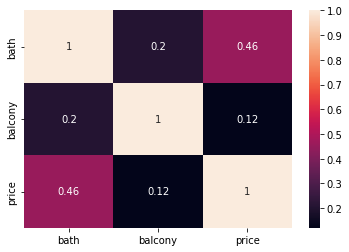

In [173]:
sns.heatmap(df.corr(),annot=True)

In [1]:
10+20

30

In [6]:
df

area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.0      1.0   39.07  
1      4 Bedroom  Theanmp       2600   5.0      3.0  120.00  
2          3 BHK      NaN       1440   2.0      3.0   62.00  
3          3 BHK  Soiewre       1521   3.0      1.0   95.00  
4          2 BHK      NaN       1200   2.0      1.0   51.00  
...          ...      ...        ...   ...      ...     ...  
13315  5 Bedroom  ArsiaEx       3453   4.0      0.0  231.00  
13316      4 BHK      NaN       3600   5.0      NaN  400.00  
13317      2 BHK  Mahla T       1141   2.0      1.0   60.00  
13318      4 BHK  SollyCl       4689   4.0      1.0  488.00  
13319      1 BHK      NaN        550   1.0      1.0   17.00  

[13320 rows x 9 columns]

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
import matplotlib.pyplot as plt
import seaborn as sns
import re
df=pd.read_csv(r"C:\Users\91703\Downloads\Bengaluru_House_Data.csv")
# print(df.shape)
class PreprocessingData():
    def __init__(self,data,Target=None):
        self.df=data
#         if Target in df.columns:
#             self.df=data.drop(Target,axis=1)
#             self.Y=data[Target]
#         else:
#             self.df=df
    def preprocessing(self):
        def miss_values():  # change from here
            try:
                self.df.drop('society',axis=1,inplace=True)
            except:
                pass
            if self.df['size'].isnull().sum()>0:
                self.df.drop(np.where(df['size'].isnull())[0],axis=0,inplace=True)
                self.df['size']=self.df['size'].apply(lambda x:int(x.split( )[0]) if type(x)==str else int(x))
            else:
                self.df['size']=self.df['size'].apply(lambda x:x.split( )[0] if type(x)==str else x)
            if self.df['availability'].isnull().sum()==0:
                self.df.loc[self.df['availability']!='Ready To Move','availability']='other'
            else:
                self.df['availability'].fillna(self.df['availability'].mode()[0],inplace=True)
            if self.df.isnull().sum().sum()>0:
                self.df.dropna(inplace=True)
            else:
                pass
            self.df.reset_index(drop=True,inplace=True)
#             print(self.df.shape)
    
#      
#            
        miss_values()

        try:
            def total_sqft(str1):
                if re.findall('[\d]+[\s]*[-]{1}[\s]*[\d]',str1):
                        a=re.findall('[\d]+[\s]*[-]{1}[\s]*[\d]+',str1)
                        z=re.split('-',a[0])
                        mean=(int(z[0])+int(z[1]))/2
                        return str(mean)
                else:

                    if 'Acres' in str1:
                        list1=[]
                        for i in str1:
                            if i.isdecimal() or i=='.':
                                list1.append(i) 
                        h=''.join(list1)
                        Sqaure_foot=float(h)*43560
                        return str(round(Sqaure_foot,2))    


                    elif 'Sq. Meter' in str1:
                        list1=[]
                        for i in str1:
                            if i.isdecimal() or i=='.':
                                list1.append(i)
                        if list1.count('.')==2:
                            list1.pop(-1)
                            h=''.join(list1)
                            Sqaure_foot=float(h)*10.764
                            return str(round(Sqaure_foot,2))
                        else:
                            h=''.join(list1)
                            Sqaure_foot=float(h)*10.764
                            return str(round(Sqaure_foot,2))

                    elif 'Sq. Yards' in str1:
                        list1=[]
                        for i in str1:
                            if i.isdecimal() or i=='.':
                                list1.append(i)
                        if list1.count('.')==2:
                            list1.pop(-1)
                            h=''.join(list1)
                            Sqaure_foot=float(h)*9
                            return str(round(Sqaure_foot,2))
                        else:
                            h=''.join(list1)
                            Sqaure_foot=float(h)*9
                            return str(round(Sqaure_foot,2))

                    else:
                        list1=[]
                        for i in str1:
                            if i.isdecimal() or i=='.':
                                list1.append(i)

                        return ''.join(list1)

            self.df['total_sqft']=self.df['total_sqft'].apply(total_sqft).astype('float')
#             print(self.df.isnull().sum())
        except:
                pass
    def Encoding(self):
        self.df['area_type']=self.df['area_type'].astype('category')
        self.df['area_type']=self.df['area_type'].cat.codes
        encode_data=pd.get_dummies(self.df['availability'])
        self.df=pd.concat([self.df,encode_data],axis=1)
        self.df.drop('availability',axis=1,inplace=True)
        da=self.df['location'].value_counts() 
        for i in np.where(da<10)[0]:
            self.df.loc[i,'location']='other1'
        
        encode_data1=pd.get_dummies(self.df['location'])
        col=pd.get_dummies(self.df['location']).columns
        encode_data1.reset_index(drop=True,inplace=True)
        self.df.reset_index(drop=True,inplace=True)
        self.df=pd.concat([self.df,encode_data1],axis=1)
        self.df.drop('location',axis=1,inplace=True)

class SplitData(PreprocessingData):
    def split_data(self):
        self.preprocessing()
        self.Encoding()
        X=self.df.drop('price',axis=1)
        Y=self.df['price']
        X_train,X_test,Y_trian,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
        self.X_train=X_train
        self.X_test=X_test
        self.Y_trian=Y_trian
        self.Y_test=Y_test
class LinearModel(SplitData):
    def LinearRegression(self):
        self.split_data()
        self.price1=LinearRegression()
        reult=self.price1.fit(self.X_train,self.Y_trian)
        print('Model Train Succefully....')
    def ModelEvalution(self):
        r2_score=self.price1.score(self.X_test,self.Y_test)
        print(r2_score)
#     def predictor(self,data1):
        
        
        
        
        
# price.split_data()
b=LinearModel(df,Target='price')
b.LinearRegression()
b.ModelEvalution()

Model Train Succefully....
0.32153442343680494
